# Actividades de la Sección Avanzada (Técnicas de Clasificación ML):

### Autor : Alexander Garcia
----

# Resumen

Este es el tutorial de nivel avanzado para  de Ciencia de Datos (DS) y Aprendizaje Automático (ML), donde trabajaremos de principio a fin diferentes aspectos y técnicas en DS y ML para Investigación y Análisis.

En este tutorial trabajaremos a través de técnicas y estrategias de Machine Learning sobre los datos de genes de los mismos cinco tipos de cáncer (BRCA, KIRC, COAD, LUAD, PRAD) de los proyectos TCGA disponibles en el [National Cancer Institute's Genomic Data Commons](https://gdc.cancer.gov/). 

Seguiremos trabajando con las *bibliotecas de Python* introducidas en los Tutoriales para Principiantes e Intermedios e introduciremos algunas nuevas bibliotecas con propósitos especiales en **Aprendizaje de Máquinas**.

> Bibliotecas utilizadas en este tutorial

* Manipulación y Procesamiento de Datos
     - pandas]( https://pandas.pydata.org/)
     - [numpy]( https://numpy.org/)
* Visualización de Datos
	- [Matplotlib](https://matplotlib.org/)
    - Seaborn](https://seaborn.pydata.org/)
    - Altair](https://altair-viz.github.io/)
* Estadísticas
    - [Scipy](https://www.scipy.org/)
    - Modelos estadísticos](https://www.statsmodels.org/stable/index.html)
* Aprendizaje automático
    - [Scikit-Learn](https://scikit-learn.org/stable/)
    
En este tutorial nos centraremos específicamente en el modelado de Machine Learning en **python**. Nos centraremos principalmente en:

* Introducción a lo que es Machine Learning
* Conceptos y técnicas fundamentales en ML
* Introducción y familiarización con el uso de **Scikit-Learn**.
* Categorías fundamentales de modelos
* Algunos ejemplos específicos con modelos ML de regresión y clustering.

# Índice

[1. Introducción al Aprendizaje Automático: ¿Qué es el Aprendizaje Automático?](#1.-Introducción al Aprendizaje Automático:-¿Qué es el Aprendizaje Automático?)
* 1.1 Tipos de modelos de aprendizaje automático](#1.1-Tipos de modelos de aprendizaje automático)
    * 1.1.1 Aprendizaje automático supervisado](#1.1.1-Aprendizaje automático supervisado)
    * 1.1.2 Aprendizaje automático no supervisado](#1.1.2-Unsupervised-Machine-Learning)
    
* 1.2 Ideas y conceptos básicos de ML](#1.2-Key-Basic-ML-Ideas-and-Concepts)

    - 1.2.1 Entrenamiento y pruebas](#1.2.1-Training-and-Testing)
    - 1.2.2 Compensación entre sesgo y varianza](#1.2.2 Compensación entre sesgo y varianza)
    - 1.2.3 Ingeniería de características](#1.2.3-Ingeniería de características)

* 1.3 Antecedentes de los modelos tutoriales de ML: clasificación y agrupación](#1.3-Background-on-Tutorial-ML-models---Classification-&-Clustering)
    - 1.3.1 Modelos de clasificación](#1.3.1-Modelos de clasificación)
        - Regresión logística](#Regresión-Logística)
        - Bosques de decisión y aleatorios](#Bosques de decisión y aleatorios)
        - Máquinas de vectores soporte (*SVM*)](#Máquinas de vectores soporte (-SVM-))
    - 1.3.2 Modelos de agrupación](#1.3.2-Modelos de agrupación)
        - K-Means](#K-Means)
        - Modelos de mezclas gaussianas](#Modelos-de-mezclas-gaussianas)
        - DBSCAN(*Density Based Clustering*)](#DBSCAN-(-Density-Based-Clustering-))
    - 1.3.3 Reducción dimensional para visualización](#1.3.3-Reducción dimensional para visualización)
    
[2. Configuración](#2.-Configuración)
* [2.1 scikit-learn](#2.1-scikit-learn)
* [2.2 Importar bibliotecas y datos](#2.2-Importing-Libraries-and-Data)
* [2.3 Comprobación de datos y EDA](#2.3-Checking-Data-and-EDA)

[3. Aprendizaje automático supervisado](#3.-Aprendizaje automático supervisado)
- 3.1 Configuración del experimento y selección del modelo](3.1-Experiment-Setup-and-Model-Selection)
- 3.2 Regresión logística](#3.2-Regresión logística)
- 3.3 Árboles de decisión y bosques aleatorios](#3.3-Arboles de decisión y bosques aleatorios)
- 3.4 Máquinas de vectores soporte _(SVM)_](#3.4-Máquinas de vectores soporte-(-SVM-))

[4. Aprendizaje automático no supervisado](#4.-Unsupervised-Machine-Learning)
- 4.1 K-Means](#4.2-K-Means)
- 4.2 Modelos de mezcla gaussiana](#4.2-Modelos de mezcla gaussiana)
- 4.3 DBSCAN](#4.3-DBSCAN)

------

# 1. Introducción al aprendizaje automático: ¿Qué es el aprendizaje automático?

En el mundo de la analítica y específicamente de la Ciencia de Datos, _"Machine Learning"_ es tan omnipresente y una gran palabra de moda lanzada por todas partes. A veces en el contexto de _"¡Usamos ML en nuestro (inserte producto)!"_ o _"Sólo tiene que utilizar ML y obtendrá la respuesta",_ siendo casi este concepto esotérico en Ciencia de Datos a menudo asociado como parte de la IA.

Una mejor forma de ver el Aprendizaje Automático es como la unión de los conceptos de programación informática (Cuaderno del Principiante) y los conceptos estadísticos (Cuaderno Intermedio) en Ciencia de Datos. La idea principal a recordar es que estamos construyendo modelos a partir de datos, donde nuestros modelos "aprenden" o se afinan a partir de los datos y luego pueden hacer predicciones sobre datos similares pero nunca antes vistos.  


## 1.1 Tipos de modelos de aprendizaje automático

Existe una gran variedad de modelos de aprendizaje automático con los que podemos trabajar, pero es importante recordar siempre que nuestro problema o pregunta dictará el tipo de modelos que podemos utilizar. En otras palabras, _no intentes pintar una pared con un martillo_ o _atornillar una estantería con una sierra_ , cada herramienta tiene un escenario de uso óptimo. Puede que resulte tentador utilizar un modelo que suene bien, como "K-Means" o "Support Vector Machine", para su investigación, pero si está intentando predecir los efectos de la dosis de un fármaco sobre la rapidez con la que un cáncer hace metástasis, puede que esté utilizando la herramienta equivocada para el trabajo.

Analicemos primero los dos tipos principales en los que se clasifican los algoritmos de aprendizaje automático: [_Supervisados_] y [_No supervisados_].

### 1.1.1 Aprendizaje automático supervisado

Recordemos que el Aprendizaje Automático consiste en que nuestros modelos "aprenden" de nuestros datos, por lo que el _Aprendizaje Automático Supervisado_ sería un modelo que "aprende" de datos a los que ya se han asignado algunas etiquetas. Algunos de los modelos que caen bajo este tipo de ML son _Regresión_ y _Clasificación_ , como el modelo de Regresión Lineal con datos continuos para predecir un valor continuo (edad, dosis, tiempo, etc) o Regresión Logística para clasificar valores (sexo, fumador, nivel de educación, etc).  Si nuestros datos ya tienen etiquetas y queremos averiguar la relación de una variable objetivo con esas etiquetas, estamos ante un problema de Aprendizaje Supervisado.

### 1.1.2 Aprendizaje automático no supervisado

Dado que el Aprendizaje Supervisado requiere etiquetas para nuestros datos, _Aprendizaje Automático No Supervisado_ es el nombre que reciben los modelos que utilizan datos no etiquetados, lo que significa principalmente que "omitimos" las etiquetas que puedan existir en nuestros datos, permitiendo que el modelo aprenda patrones a partir de algunas características. Este tipo de modelos suelen utilizarse para _Clustering_ o para _Reducción de Dimensión_.

## 1.2 Ideas y conceptos básicos de ML

El Aprendizaje Automático, como cualquier otro campo especializado, tiene su propio lenguaje y conceptos clave que son omnipresentes en todas las secciones de la disciplina. Tocaremos algunos de ellos a medida que trabajemos en el tutorial y los ejemplos, ya que se abordarán mejor allí. Por ahora, queremos señalar 4 de las terminologías y conceptos más utilizados para que tengamos una mejor comprensión al empezar el tutorial.

### 1.2.1 División de datos de entrenamiento y prueba

Uno de los conceptos clave dentro del aprendizaje automático es que estamos _"entrenando nuestro modelo estadístico en datos, para luego hacer predicciones"_ , la clave aquí es la idea de que necesitamos tener datos para ___entrenar___ nuestros modelos. Los algoritmos de aprendizaje automático son algoritmos matemáticos y están estrechamente relacionados con la estadística, y como tales toman los datos y tratan de encontrar una manera óptima de resolver el algoritmo, por lo tanto está siendo _entrenado_ por los datos. Alimentamos los datos, entrenamos nuestros modelos y luego comprobamos lo bien que nuestro modelo predice lo que queremos. 

De acuerdo, los datos están "entrenando" nuestros modelos. Pero, ¿por qué necesitamos tener múltiples conjuntos de datos separados?

Por ejemplo:

> Tenemos un conjunto de datos de listados de casas, con características de tamaño de la casa, barrio, año de construcción, número de habitaciones y baños, y el precio de venta. Queremos predecir por cuánto se venderá una casa dadas las otras características. Así que entrenaríamos nuestro modelo con nuestros datos, introduciendo todas las características y el objetivo a predecir ('precio de venta') para nuestro modelo. A continuación, querríamos averiguar cómo funciona nuestro modelo, si se ajusta a los precios de venta reales.  
¿Cómo podemos comprobarlo?  
Podríamos tomar algunos de los anuncios de nuestros datos e intentar predecir su precio de venta con nuestro modelo entrenado.
 

### 1.2.2 Sobreajuste, infraajuste, compensación entre sesgo y varianza

Cuando evaluamos el rendimiento de un modelo __entrenado_ en una tarea utilizando los mismos datos que se usaron para entrenar el modelo, nos encontramos con el problema del ___Sobreajuste___ .

> En estadística, el __Overfitting__ es la producción de un análisis que se corresponde demasiado estrechamente o exactamente con un conjunto particular de datos, y por lo tanto puede fallar a la hora de ajustarse a datos adicionales o predecir observaciones futuras de forma fiable.  
-OxfordDictionary.com

Entonces, _¿Por qué necesitamos tener conjuntos de datos de __entrenamiento y prueba__ independientes?_ Si no lo hacemos, nos encontramos con el problema de no saber cómo estamos sobreajustando y evaluar adecuadamente cómo está funcionando nuestro modelo y si no está "aprendiendo" las características generales de los datos, en lugar de centrarse en pequeñas fluctuaciones o "ruido" de los datos.

Del mismo modo, si podemos _Overfit_ un modelo, un modelo también puede ser ___Underfitted___, lo que significa que en lugar de quedar atrapado en las pequeñas fluctuaciones de los datos, ahora se pierde la tendencia general de los datos. El infraajuste se produce cuando nuestro modelo ha sido entrenado en un conjunto de datos demasiado pequeño para que nuestro modelo capte suficiente información.

Ambos casos forman parte de lo que se conoce como ___El equilibrio entre sesgo y varianza___ . Tratamos de entrenar modelos precisos, sin quedar atrapados en el ruido _(Sobreajuste - Alta varianza y bajo sesgo)_ y que no pierdan las tendencias _(Bajo ajuste - Alto sesgo y baja varianza)_ , en los datos de entrenamiento que se utilizarán en nuestros datos de prueba.

Podemos abordar estos problemas de varias maneras:

Overfitting | Underfitting 
--------------|-------------
Aumentar los datos de entrenamiento | Reducir/eliminar el ruido  
Cambiar el tipo de función de pérdida | Aumentar la complejidad del modelo 
Reducir características (selección/ingeniería) | Aumentar características (selección/ingeniería)

Estas son sólo algunas sugerencias que podemos hacer para tratar de abordar el compromiso, pero como podemos ver hay un punto dulce en el que estamos tratando de comprometernos para que nuestro modelo pueda tener un _buen_ ajuste una vez que evaluemos nuestro modelo en nuevos datos.

### 1.2.3 Ingeniería de características 

La ingeniería de características es una de las formas más importantes de controlar la complejidad y la precisión de nuestros modelos, es decir, de abordar también la tendencia de la varianza. Como sabemos, nuestros conjuntos de datos suelen dividirse en _características_ que modelizar y una _variable objetivo_ que un modelo debe predecir. De este modo, podemos deducir inmediatamente la importancia de las características para el rendimiento de un modelo. 

Es importante saber qué es lo que queremos conseguir con nuestro modelo, ya que esto nos puede ayudar a empezar a "diseñar" las características mejores o más útiles. Tenemos que ser capaces de identificar la utilidad y la importancia que puede tener una característica a la hora de abordar nuestro objetivo; probablemente no se nos ocurriría añadir el "sabor favorito de bebida energética" de un paciente como característica apropiada para predecir la tensión arterial. Así pues, la _selección de rasgos_ adecuada es un aspecto clave en el paso de procesamiento de datos que desarrolla un buen modelo.

La _ingeniería de rasgos_ es el proceso de crear rasgos específicos del dominio a partir de los que están disponibles "naturalmente" en los datos. Podemos construir cuidadosamente características a partir de las respuestas abiertas de una encuesta o crear algunas relaciones que engloben mejor los aspectos de los datos que las características originales. Por ejemplo, podemos crear _características binarias (0 o 1/ sí o no)_ si los datos coinciden con una condición (por ejemplo, si el paciente es diabético, su sexo, su grupo de edad, etc.).  Del mismo modo, podemos crear características como el porcentaje de veces que la PA sistólica es alta durante el entrenamiento o el embarazo. Aquí es donde queremos reconocer que la ingeniería de características forma parte del _arte del oficio_ del aprendizaje automático.


### 1.2.4 Funciones objetivo y de pérdida

Para los modelos de Aprendizaje Automático, tenemos lo que se llama una _"Función de Pérdida/Coste/Objetivo"_ que tratamos de maximizar o minimizar (dependiendo del objetivo) para calcular el conjunto óptimo de pesos que nuestras características tienen en las tendencias de nuestros datos. Para mayor claridad, queremos maximizar nuestra _Función Objetivo_ y esto se consigue minimizando nuestra _Función de Pérdida_ . 

Tenemos bastantes opciones de _Funciones de Pérdida_ entre las que elegir dependiendo de lo que estemos intentando conseguir con nuestros modelos, pero por simplicidad también podemos dividirlas en _Funciones de Pérdida de Clasificación y Regresión_ . Algunos ejemplos son:

Classification | Regression 
--------------|-------------
Pérdida logarítmica | Error cuadrático medio  
Pérdida de bisagra | Error medio absoluto 
Pérdida exponencial | Pérdida de Huber

Algunas de las funciones más utilizadas e incluso _por defecto_ en los modelos de aprendizaje automático preempaquetados (como los que utilizaremos en el tutorial) son _Log Loss_ y _Mean Square Error_ .

No hace falta decir que debemos familiarizarnos con las funciones específicas y cómo funcionan para nuestro proyecto específico de aprendizaje automático, pero por ahora estas son sólo una referencia. 


### 1.2.5 Evaluación de modelos

Como hemos comentado antes, evaluar el rendimiento de nuestros modelos con datos _"Nuevos o no vistos"_ es un paso crucial para asegurarnos de que nuestro modelo funciona como esperamos. Hay una variedad de maneras en que podemos lograr esto como podemos imaginar, pero de nuevo podemos dividirlos en _Métricas de Evaluación de Clasificación y Regresión_ .
Para la clasificación tenemos 
- Matriz de confusión](https://en.wikipedia.org/wiki/Confusion_matrix)
- Área bajo la curva (AUC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
- Precisión](https://en.wikipedia.org/wiki/Precision_and_recall#Precision), [Recall](https://en.wikipedia.org/wiki/Precision_and_recall#Recall), [F1-score](https://en.wikipedia.org/wiki/F-score)

En el caso de la regresión, la métrica más común suele ser [_Mean Square Error_](https://en.wikipedia.org/wiki/Mean_squared_error), que mide la media del cuadrado de los errores o la diferencia entre los valores predichos y los reales.

Evaluamos cada modelo según una métrica elegida y luego podemos ir mejorando la puntuación ___ejecutando [hiperparámetros](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning))___ en el modelo. Por _hiperparámetros_ , se entiende parámetros que son intrínsecos al modelo que estamos utilizando, digamos "ajustar un valor de _regularización_ ", "cambiar el número de árboles en un modelo de bosque aleatorio", o "elegir un tipo diferente de solucionador _kernel_".   

## 1.3 Antecedentes de los modelos de ML Tutorial - _Clasificación y Clustering_

El aprendizaje automático, en general, se utiliza para dos cosas diferentes: *predicción* y *descripción*. O bien intentas utilizar patrones para predecir el valor de algo que aún no has observado, o bien intentas describir observaciones que ya tienes en los datos. Recuerde siempre que el tipo de modelos de ML que puede utilizar depende tanto de los datos que tenga a mano como de las preguntas que intente responder.

Para los fines de nuestro tutorial, dados nuestros datos genómicos sobre el cáncer, nos centraremos más en un objetivo descriptivo que en predicciones, pero tenga por seguro que podemos seguir las ideas presentadas aquí y aplicarlas a la investigación predictiva utilizando las _herramientas adecuadas_ .

El objetivo del trabajo *descriptivo*, más formalmente conocido en ML como _clasificación y agrupación_ , es proyectar alguna estructura sobre los datos, y nuestro objetivo es averiguar si podemos "encontrar" alguna estructura entre la expresión del recuento de genes y los tipos de cáncer.

Consideremos datos como con los que estamos trabajando aquí: niveles de expresión de recuento de genes para una serie de muestras. 

> ¿Se pueden categorizar los tipos de cáncer a través de su expresión de recuento de genes? ¿Y si quisiera agruparlos? ¿Se pueden separar las muestras en subconjuntos distintos basándose en la similitud entre sus expresiones génicas?


### 1.3.1 Modelos de clasificación

La __clasificación__ en Aprendizaje Automático se refiere a modelos que predicen una(s) etiqueta(s) para los datos dados, y pertenecen al _Aprendizaje Supervisado_ ya que se necesita una etiqueta. 

En los problemas de _clasificación_, normalmente tenemos una _'Etiqueta de Clase'_ descriptiva que intentamos predecir a partir de las características de nuestros datos. Esto requiere que los datos utilizados para entrenar nuestro modelo tengan suficientes muestras con características y etiquetas para que nuestro modelo aprenda de ellas. Estas etiquetas de clasificación pueden ser binarias, multiclase o desequilibradas. 

Estos modelos calculan la mejor correspondencia entre las características y las etiquetas predichas, que pueden evaluarse en función del rendimiento de las etiquetas _predichas_ en comparación con las etiquetas _reales_ de un conjunto de prueba o de espera.

### Regresión logística

Probablemente el modelo de clasificación más sencillo y utilizado, la _Regresión Logística_ se suele emplear como modelo de partida para comparar el rendimiento de modelos más complejos.

La regresión logística funciona implementando lo que se conoce como [_Función sigmoidea_](https://en.wikipedia.org/wiki/Sigmoid_function):
$$
S(x) = \frac{1}{1+e^{-x}}
$$
> $S(x)$: es una salida entre 0 y 1 para la estimación de probabilidades  
$x$: entrada para nuestra función  

Dado el conjunto de características de nuestros datos, una vez introducidos en la función obtenemos una estimación de probabilidad que puede transformarse en un 0 o un 1 en función de un _Límite de decisión_ . El límite es un valor de 'corte' en el que dictamos que una muestra específica es 0, si está por debajo del valor del límite, o 1, si está por encima del valor del límite.


#### Regresión logística Pros y contras
Pros | Contras
--------- | -----------
Fácil de implementar y utilizar | El rendimiento depende en gran medida de la selección y la ingeniería de características
Simple, eficaz y no requiere demasiados recursos informáticos | No es muy potente, puede ser superado fácilmente por modelos más complejos
Altamente interpretable | No puede resolver problemas no lineales, mejor uso si las categorías pueden ser "separadas por una línea"
Necesita poco o ningún ajuste | Sólo puede predecir resultados categóricos y es vulnerable al sobreajuste



### Decision Tress y Random Forests

Los bosques aleatorios son básicamente un conjunto de árboles de decisión, por lo que son algunos de los modelos más utilizados y potentes en el ámbito del aprendizaje automático supervisado, ya que proporcionan una mayor precisión, estabilidad y facilidad de interpretación.

El modelo de Árbol de Decisión funciona en torno a los conceptos de [_Ganancia de Información_ y _Entropía_](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees):

> $$
Entropía: H(X) = - \sum_{i} p_i(x) (log_2 * p_i(x))
$$
$$
Ganancia de información: IG(T, a) = H(T) - \sum_{v\in valores(a)} P_a(v) * H(T_a(v)) 
$$
o también puede describirse como  
$$
IG(T, a) = H(T) - H(T|a)
$$
La _Ganancia de Información_ es la entropía de $T$ menos la entropía de los valores de $T$ dados $a$.

Al final, el objetivo de los modelos de árbol es maximizar la _Ganancia de información_ minimizando la _entropía_ .

#### Pros y contras de los modelos de árbol
Pros | Contras
--------- | -----------
Fácil de usar y buen poder predictivo | Puede sobreajustarse
Es indulgente con el preprocesamiento de datos | Muestra sesgo a favor de características con más niveles
Permite ajustar varios parámetros para mejorar el rendimiento | muchos parámetros de ajuste también pueden volverse complejos
Proporciona la importancia de las características en el modelo | A veces puede parecer una 'caja negra

### Máquinas de vectores soporte (*SVM*)

Las máquinas de vectores de soporte son modelos de aprendizaje supervisado que funcionan calculando un hiperplano óptimo que permite una separación clara de los grupos en los datos.

SVM se centra principalmente en tratar de maximizar el margen del hiperplano que permite la separación, y esto se logra centrándose en maximizar la función [_Hinge Loss_](https://en.wikipedia.org/wiki/Hinge_loss):
> $$
c(x, y, f(x)) = \left\{
\begin{array}{ll}
      0 y si y*f(x) > 1
      1 - y*f(x) & else \\
\fin{array} 
\derecha.
$$


#### SVM Pros y Contras
Pros | Contras
--------- | -----------
Bueno para datos con separación clara | No funciona bien si hay mucho ruido, mala separación
Eficaz en espacios de alta dimensión | No tan eficaz con grandes conjuntos de datos
Eficaz cuando hay más características que muestras | No hay explicación probabilística para la clasificación

### 1.3.2 Modelos de Clustering

__Clustering__ es la categoría de herramientas de ML que se ocupa de la agrupación o partición de objetos, y pertenecen al _Unsupervised Learning_ ya que permitimos que los modelos den sentido a los datos.

Los conjuntos de datos normalmente no contienen una medida por la que se deba agrupar o particionar directamente. De forma similar a las funciones de 'pérdida' utilizadas en otros modelos de ML, los algoritmos de clustering utilizan varias métricas derivadas que se supone que capturan la diferencia, o 'disimilitud', entre las observaciones. El objetivo de la agrupación es identificar subconjuntos de datos para los que la métrica de disimilitud sea baja dentro de un subconjunto y mayor entre los subconjuntos.

Una vez que un modelo determinado consigue una agrupación satisfactoria, puede utilizarse para asignar nuevas observaciones (por ejemplo, nuevas muestras de expresiones genéticas) a las agrupaciones establecidas. Un ejemplo habitual es la clasificación de imágenes. Una vez que se dispone de un modelo de trabajo que agrupa las fotos en clusters de "gato" y "perro", se pueden etiquetar nuevas fotos como de "gato" o "perro" en función del cluster al que se asignarían.

En las siguientes secciones se ofrece una breve explicación de algunos algoritmos de agrupación diferentes, así como de los puntos fuertes y débiles de cada uno de ellos. **Evite utilizar un algoritmo de agrupación aleatorio en cualquier situación.

### K-Means

Quizás el algoritmo de clustering más sencillo es *k-means*.

La métrica en la que se centra este método es la distancia euclidiana entre puntos. Como referencia:

> Distancia Euclidiana
>
> $d(p, q) = \sqrt{\sum_{i=0}^{{n}{(q_{i} - p_{i})^{2}}$
>
> donde **p** y **q** son puntos en un espacio euclidiano de **n** dimensiones
>
> $q_{i}, p_{i}$ son las componentes de los vectores correspondientes a cada punto

El algoritmo es el siguiente:

>1. Elegir K puntos aleatorios como "centros" de conglomerados
>*Repite los pasos 2 y 3 hasta la convergencia:*
>
>2. Asignar cada punto al 'centro' de cluster más cercano en distancia euclidiana
>3. Los 'centros' de los clusters se sustituyen por la media de todos los puntos asignados a ellos

Convergencia significa aquí que el cambio aplicado durante cada repetición del paso 4 deja de producirse (el algoritmo se ha 'asentado' en los centros de los clusters).

#### K-Means Pros y Contras

Pros | Contras
--------- | -----------
Fácil de aplicar: es necesario elegir el número _k_ manualmente.
puede crear clusters si los datos están agrupados en bloques circulares | Si los datos presentan bloques de forma más irregular, k-means será inadecuado
no utiliza la probabilidad | depende de los valores iniciales

### Modelos de mezclas gaussianas
Mientras que K-means es rígido debido a su simplicidad, los modelos de mezcla gaussiana son más flexibles.

La idea general de los GMM es utilizar una distribución gaussiana para representar cada conglomerado. Esto nos permite considerar la probabilidad de que un punto determinado proceda de la distribución que representa a un conglomerado concreto.

Una mezcla gaussiana es simplemente múltiples gaussianas combinadas en una función.

> Modelo de mezcla gaussiana
>
> $p(x) = \sum_{i=1}^{K}{\phi_{i} N(x | \mu_{i}, \sigma_{i})}$
> 
> $\phi_{i}$ representa el peso aplicado a la gaussiana i *(estos pesos suman 1)*
>
> $\mu_{i}$ y $\sigma_{i}$ son la media y la matriz de covarianzas de la gaussiana i

**Maximización de expectativas**

Si los parámetros del MMG son el peso, la media y la covarianza de cada gaussiana, ¿cómo podríamos averiguar los valores ideales de estos parámetros para representar nuestros datos? Hacerlo analíticamente es imposible en la mayoría de las situaciones. En su lugar, podemos intentar maximizar la probabilidad de que nuestros datos observados procedan de un MMG con valores de parámetros específicos. Esto se hace de forma iterativa cambiando repetidamente los valores hasta que el proceso converge. Esto se denomina maximización de expectativas.

El algoritmo es el siguiente:

> 1. Establecer los parámetros $\phi_{i}$, $\mu_{i}$, y $\sigma_{i}$ a los valores iniciales basados en los datos
> 2. Para cada punto, calcular la probabilidad de pertenecer a cada componente gaussiana
> > $\gamma_{i,k}$ = probabilidad de que $x_{i}$$ pertenezca a la componente $k$
> 3. Dadas estas probabilidades, actualice los parámetros en este orden
> $\phi_{k} = \sum_{i=1}^{N}{frac{\gamma_{i,k}}{N}}$.
> >
> > $\mu_{k} = \frac{\sum_i=1}^{N}{\gamma_i,k} x_{i}}}{\sum_i=1}^{N}{\gamma_i,k}}$
> >
> > $\sigma_{k}^{2} = \frac{\suma_{i=1}^{N}{gamma_{i,k}(x_{i} - \mu_{i})^{2}}{\suma_{i=1}^{N}{gamma_{i,k}}$
> 
> Detener una vez que el cambio en lo anterior es menor que algún umbral.

Una vez hecho esto, se puede utilizar el teorema de Baye para calcular la probabilidad de que un punto determinado pertenezca a cada componente gaussiana. El de mayor probabilidad es al que se asigna el punto para la salida del clustering.

#### Pros y contras de los modelos de mezclas gaussianas

Pros | Contras
--------- | -----------
Puede capturar una variedad más amplia de formas de conglomerados que los modelos más simples (*K-Means*) | todavía puede capturar sólo conglomerados cuya forma puede encajar en una distribución gaussiana
Los clusters que tienen formas más irregulares, los GMMs pueden ser inadecuados para capturarlos.


### DBSCAN(*Clasificación basada en la densidad*)
Los algoritmos K-means y GMM asumen que los conglomerados que se identifican son manchas convexas, ya que éstas pueden representarse por distancia desde un punto central o por distribuciones gaussianas alrededor de algún punto central. El clustering basado en la densidad es una forma de identificar los clusters en la que el punto central es menos relevante, y en la que la contigüidad del grupo es lo que más importa.

&nbsp;

DBSCAN son las siglas de Density Based Spatial Clustering of Applications with Noise (agrupación espacial de aplicaciones con ruido basada en la densidad). La idea general es utilizar una densidad previamente decidida para evaluar si un punto determinado forma parte de un grupo o es un valor atípico. El algoritmo tiene dos parámetros 
- $\epsilon$ : la distancia de un punto que se considerará su vecindad
- $minPts$ : el número mínimo de puntos necesarios en una vecindad para definir un cluster.

El algoritmo es el siguiente
> 1. 1. Decidir $\epsilon$ y $minPts
> 2. 2. Elegir un punto aleatorio P aún no visitado
> 3. Si hay $minPts$ en la vecindad de P, crear un cluster y añadir todos los puntos de esa vecindad a ese cluster
> > Para cada punto en la vecindad de P, repite el paso 3, añadiéndolos todos al mismo cluster
> > 
> > EXCEPTO... si un punto en la vecindad NO tiene $minPts$ en su propia vecindad, añádalo al cluster pero NO repita el paso 3 para ese punto
> 4. Si NO hay $minPts$ en la vecindad de P, etiquete ese punto como ruido (no forma parte de un cluster)
> 5. Repita los pasos 2 - 4 hasta que todos los puntos hayan sido añadidos a un cluster o etiquetados como ruido.

Intuitivamente, el algoritmo recorre los datos y etiqueta como conglomerados las secciones de los mismos que satisfacen una densidad mínima. La forma no importa, la baja densidad es lo que se utiliza para separar los grupos. Mientras la densidad establecida se ajuste bien a los datos, se puede capturar cualquier forma de cluster.

#### DBSCAN Pros & Contras

Pros | Contras
--------- | -----------
Capacidad para capturar conglomerados con formas irregulares | Se supone que los conglomerados tienen una densidad uniforme en toda su extensión
Muy eficaz para identificar valores atípicos | Requiere que se seleccione un valor para la densidad, no necesariamente directo


### 1.3.3 Reducción de dimensiones para la visualización

La reducción de dimensiones se refiere a cualquier proceso mediante el cual las dimensiones de los datos se limitan a algún objetivo (como 3 dimensiones, lo que permitiría la visualización). Una forma sencilla de reducir las dimensiones consiste en eliminar algunas de las características. Esto puede funcionar en muchos contextos, seleccionando las características que capturan la mayor varianza. Sin embargo, en nuestro caso puede que no tenga sentido eliminar algunos genes arbitrariamente. 

&nbsp;

**El Análisis de Componentes Principales** es un proceso que se utiliza para *proyectar* datos en una dimensión inferior. Sin entrar en detalles técnicos, la forma en que funciona es que encuentra el hiperplano a lo largo del cual los datos varían más, y luego proyecta los datos en ese hiperplano. Cada vez que se hace esto, la dimensionalidad de los datos se reduce en 1. Esto se repite hasta que se alcanza el número deseado de dimensiones.

&nbsp;

Imagine un diagrama de dispersión 2D. PCA encontraría la línea a lo largo de la cual los puntos están más dispersos y, a continuación, proyectaría los puntos sobre esa línea. Imagínese que cada punto del diagrama de dispersión se desplaza sobre la línea, siguiendo la distancia más corta a la línea (perpendicular a ella). De este modo se ha "capturado" toda la varianza posible de los datos 2D en una sola dimensión.

&nbsp;

**EL ENGAÑO

Es muy importante saber que una vez que se realiza el PCA sobre los datos, los datos resultantes no son interpretables. Nuestros datos, por ejemplo, consisten en expresiones genéticas como características. Si eligiéramos 3 genes y trazáramos ese subconjunto de datos, podríamos mirar un punto del gráfico e interpretar en qué difieren sus expresiones génicas de las de otro punto del gráfico. 

Una vez que estos datos se proyectan en dimensiones inferiores, los ejes resultantes ya no representan nada tangible, por lo que la interpretabilidad no es posible. El uso de PCA aquí es puramente para visualizar los resultados de la agrupación, no se puede interpretar nada acerca de cómo los distintos grupos difieren en términos de expresiones génicas específicas mirando el gráfico.


# 2. Configurar

Cuando hablamos de hacer un proyecto de aprendizaje automático en python, es casi implícito que probablemente vamos a utilizar [___scikit-learn___](https://scikit-learn.org/stable/index.html) , una si no la biblioteca python estándar de la industria en modelos de aprendizaje automático.

## 2.1 scikit-learn

__Scikit-Learn__ , también conocido como ___Sklearn___ , se caracteriza por contener algunos de los algoritmos más utilizados para tareas de aprendizaje automático (Linear Regression, Random Forests, K-Nearest Neighbors, etc). El paquete y el soporte de la comunidad es muy limpio y ágil , además de proporcionar una útil documentación online.

La biblioteca requiere que tengamos nuestros datos en una configuración de marco de datos, de tal manera que las características y se pasa como un objeto de matriz (filas y columnas) y la variable de destino como una matriz.

Uno de los mejores aspectos de la librería es la uniformidad de su API para todos los proyectos de aprendizaje automático. Aquí, básicamente podemos seguir los mismos pasos de principio a fin en el uso de las funciones de las bibliotecas:
1. 1. Importa tu modelo
2. Inicie su modelo y/o ajuste sus hiperparámetros 
3. Ajustar (entrenar) el modelo a los datos
4. Aplicar el modelo, es decir, predecir o transformar los datos de prueba.

Con esto en mente, vamos a pasar a nuestros ejemplos reales y tutorial para obtener una mejor comprensión y empezar a practicar un poco de aprendizaje automático.

___Nota:___ _Skelarn_ es una librería bastante grande con una serie de funciones muy completas para varios propósitos en el ciclo de vida de un proyecto de Machine Learning. Podemos seguir adelante e 'importar' la librería como cualquier otra librería python, pero los protocolos _proper_ de importación sugeridos es que debemos importar sólo las funciones necesarias para nuestros propósitos (es decir, `train_test_split`, `StandardScaler`, etc). Seguiremos este protocolo a medida que avancemos en el tutorial e importaremos las funciones que necesitemos.

## 2.2 Importar Bibliotecas y Datos

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Statistics
from scipy import stats
import statsmodels.api as sm

# Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# visualization
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

# setting up the plot style
plt.style.use('ggplot')
%matplotlib inline

Continuaremos trabajando con los datos TCGA, por lo que implementaremos la función utilizada en el _Tutorial Intermedio_ para cargar una parte de los datos.

In [2]:
def create_genes_subset(split_size=.2):
    """
        Crear un dataframe más pequeño a partir del archivo grande 'genes.csv' basándose en una división del archivo de metadatos.
        Devuelve un marco de datos transformado por log2 y el índice necesario para que las muestras restantes
        del archivo genes.csv sigan siendo independientes.
    
    """
    
    metadata = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/metadata.csv')
    
    big_split, small_split = train_test_split(metadata, test_size=split_size, random_state=4)
    
    skiplines_small = np.sort(big_split.index) + 1 
    skiplines_big = np.sort(small_split.index) + 1
    
    genes_small = pd.read_csv('/Users/usuario/Documents/ML_python/ML_python/ml_pancancer_python/genes.csv', skiprows=skiplines_small)
    
    genes_nonAllZero = genes_small.loc[:,~genes_small.isin([0]).all(axis=0)]
    
    genes_log2_trans = np.log2(genes_nonAllZero.iloc[:,1:] + 1)
    genes_log2_trans['barcode'] = genes_small['barcode']
    
    genes_merged = pd.merge(left=small_split, right=genes_log2_trans, how='left', left_on='barcode', right_on='barcode')
    
    # Liberar memoria borrando marcos de datos
    del genes_small, genes_nonAllZero, genes_log2_trans, skiplines_small, skiplines_big
    
    return genes_merged, big_split, small_split

In [3]:
genes_merged, big_split, small_split = create_genes_subset(split_size=.7)

## 2.3 Comprobación de Datos y EDA

Ahora, echemos un vistazo a nuestros datos importados para el marco de datos `genes_merged`, recordemos que debería tener datos demográficos para cada paciente (muestra) y luego características de los datos de recuento de genes que han sido transformados logarítmicamente para tener en cuenta que están sesgados.

In [4]:
genes_merged.head(2)

,barcode,shortLetterCode,tumor_stage,age_at_diagnosis,year_of_diagnosis,alcohol_history,race,ethnicity,gender,vital_status,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,TCGA-YL-A8HJ-01A-11R-A36G-07,TP,not reported,21416.0,2009.0,Not Reported,white,not hispanic or latino,male,Alive,...,0.0,9.5147,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,TCGA-OL-A66K-01A-11R-A29R-07,TP,stage iia,26299.0,2010.0,Not Reported,white,not hispanic or latino,female,Dead,...,0.0,0.0000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256


Veamos ahora algunas proporciones sobre cómo se distribuyen los _Tipos de cáncer_ en nuestro conjunto de datos.

In [5]:
pd.DataFrame(genes_merged.groupby(['cancer_type'])['race'].count()/genes_merged.shape[0])

,race
cancer_type,
BRCA,0.355102
COAD,0.149388
KIRC,0.169388
LUAD,0.163673
PRAD,0.161224


In [6]:
pd.DataFrame(genes_merged.groupby(['cancer_type','gender'])['race'].count())

race
cancer_type gender      
BRCA        female   860
            male      10
COAD        female   176
            male     190
KIRC        female   133
            male     282
LUAD        female   209
            male     192
PRAD        male     395

Ahora, tenemos que "BRAD" es el tipo de cáncer con más muestras en nuestro conjunto de datos. También tenemos que ambos géneros aparecen en los diferentes tipos de cáncer en cierta medida, con la excepción de "PRAD" que sólo contiene hombres (tiene sentido dado que se trata de muestras de _Cáncer de próstata_). Así que si tuviéramos que intentar utilizar un modelo de aprendizaje automático para predecir los tipos de cáncer, si incluyéramos el género podríamos esperar que esa característica tuviera una gran influencia en nuestro modelo de predicción de potencias.


# 3. Aprendizaje automático supervisado

Por ahora lo que nos interesa es crear un modelo que utilice los datos de nuestros genes para predecir el tipo de cáncer, por lo que sólo mantendremos las características de los genes y las etiquetas de cáncer asociadas. Recordemos que el __Aprendizaje Automático Supervisado_ puede dividirse en ___Clasificación___ , prediciendo una etiqueta a partir de las características, y ___Regresión___ , prediciendo etiquetas continuas. Para nuestros ejemplos, nos enfocaremos en ___Clasificación_ ya que estamos tratando de determinar si podemos predecir el Tipo de Cáncer a partir de los datos de conteo de genes. 

In [7]:
# obtenemos sólo datos de expresión de recuento de genes y etiquetas de tipo de cáncer
data = genes_merged.drop(columns=['barcode', 'shortLetterCode', 'tumor_stage',
                                                                    'age_at_diagnosis','year_of_diagnosis', 'alcohol_history', 
                                                                    'race', 'ethnicity', 'gender','vital_status', 
                                                                    'year_of_birth', 'year_of_death', 'days_to_death',])
data.head(2)

,cancer_type,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281880,ENSG00000281883,ENSG00000281887,ENSG00000281896,ENSG00000281903,ENSG00000281904,ENSG00000281909,ENSG00000281910,ENSG00000281912,ENSG00000281920
0,PRAD,17.824252,10.668123,18.695129,16.119460,13.913522,15.900538,17.340550,18.896701,16.973001,...,0.0,9.5147,0.000000,16.623075,11.229908,0.000000,0.000000,11.648106,14.595309,10.197190
1,BRCA,18.674749,9.610938,19.403385,17.284063,15.981264,14.635748,16.668996,18.038344,16.590762,...,0.0,0.0000,7.541357,15.186443,10.850017,7.744871,10.110324,0.000000,14.185199,11.460256


Una vez más, recuerda que para cualquier modelo de aprendizaje automático, queremos nuestras _Features_ , "los valores 'X' de nuestra función", y nuestras _Labels_ , "los valores 'Y' que estamos prediciendo". 

Dado que nuestros datos de recuento de genes son tan variados en los valores de cada columna, también vamos a aplicar una técnica de normalización a través de la función `MinMaxScaler` de scikit-learn.

In [8]:
Y = (data.cancer_type == 'BRCA').astype('int') # establecer BRCA como 1 y otros tipos como 0 para nuestras etiquetas 
X = data.drop(columns='cancer_type') # obtener sólo el recuento de genes como características
X = MinMaxScaler().fit_transform(X) # Normalizar las características

In [9]:
# Un vistazo rápido a las Características, convirtiéndolas en un marco de datos para su visualización
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9,...,55093,55094,55095,55096,55097,55098,55099,55100,55101,55102
0,0.559525,0.493909,0.259225,0.445146,0.389075,0.504959,0.563242,0.613518,0.440469,0.286090,...,0.0,0.679982,0.000000,0.799877,0.644074,0.000000,0.000000,0.610139,0.803890,0.672427
1,0.660193,0.444964,0.398479,0.708334,0.640573,0.378811,0.504024,0.469392,0.398314,0.375456,...,0.0,0.000000,0.767697,0.730749,0.622286,0.460449,0.816949,0.000000,0.781302,0.755717
2,0.456948,0.551401,0.348940,0.695712,0.623145,0.355509,0.502846,0.704840,0.573221,0.405234,...,0.0,0.526812,0.000000,0.773748,0.669011,0.000000,0.000000,0.580553,0.682136,0.722304
3,0.660785,0.805449,0.277437,0.481644,0.498946,0.298396,0.706033,0.408959,0.386008,0.384028,...,0.0,0.000000,0.000000,0.799591,0.560837,0.000000,0.745960,0.000000,0.789995,0.808354
4,0.606695,0.499369,0.428341,0.507781,0.633799,0.348100,0.432847,0.665133,0.424099,0.573608,...,0.0,0.000000,0.000000,0.796957,0.668821,0.000000,0.813214,0.000000,0.843653,0.000000


In [10]:
# Comprobamos de la distribución de las clases
Y.value_counts()/len(Y)

cancer_type
0    0.64449
1    0.35551
Name: count, dtype: float64

Super!, ya tenemos nuestros datos listos para empezar a trabajar en nuestros modelos de aprendizaje automático. Una cosa a tener en cuenta, es la distribución de muestras "BRAD" (1) y "no BRAD" (0) en el conjunto de datos, donde tenemos una proporción _2:1_ (también podemos escribirlo como 0:2,1:1). Esto puede convertirse en un problema en nuestra clasificación cuando estamos tratando con conjuntos de datos desequilibrados, pero vamos a tratar con ese problema si viene.

Ahora lo primero que siempre tenemos que asegurarnos, es tener nuestro _Train_ y _Test_ conjuntos de datos, por lo que vamos a aplicar a la práctica `train_test_split` función de scikit-learn. 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

bien! ya tenemos nuestros datos de _Entrenamiento_ y _Prueba_ con los que trabajar para nuestros modelos. 

## 3.1 Configuración del experimento y selección del modelo

Como se ha explicado anteriormente, la _clasificación_ es un tipo de aprendizaje automático supervisado en el que tomamos las características de nuestro predictor para predecir una etiqueta específica. Hay una gran variedad de modelos de clasificación disponibles para nosotros en `scikit-learn` (por ejemplo, _Regresión lógica, árboles de decisión, Naive Bayes, etc_ ), cada uno con sus propios méritos y mejores casos de uso, y es el investigador el que debe averiguar qué modelos son los más adecuados para responder a la pregunta y con cuáles los datos funcionan mejor. 

Por ejemplo, digamos que hemos oído hablar de lo útiles que son los [_Naive Bayes Classifiyers_]para trabajar con datos "High Dimentional" como nuestro conjunto de datos de recuento de genes. Pero si hacemos una referencia rápida a la descripción del modelo, descubriremos que

>_todos los clasificadores Naive Bayes asumen que el valor de una __característica particular es independiente del valor de cualquier otra característica__ , dada la variable de clase. Por ejemplo, se puede considerar que una fruta es una manzana si es roja, redonda y tiene unos 10 cm de diámetro. Un clasificador Bayes ingenuo considera que cada una de estas características contribuye independientemente a la probabilidad de que esta fruta sea una manzana, independientemente de cualquier posible correlación entre las características de color, redondez y diámetro.  


Dado que actualmente no tenemos conocimiento de la indepencia de una característica sobre otra, no sería recomendable utilizar Naive Bayes como uno de nuestros modelos de clasificación.

Para nuestros propósitos de ejemplo, utilizaremos _Regresión Logística, Bosque Aleatorio y Máquinas de Vectores de Soporte (SVM)_ para nuestros modelos de clasificación. Estos son algunos de los modelos más utilizados y son siempre una buena base de partida para la mayoría de los proyectos de investigación y aprendizaje automático.

## 3.2 Regresión logística

El más básico de los modelos de clasificación es la Regresión Logística, y en muchos casos se utiliza como modelo base para medir cómo de bien lo estamos haciendo. Para python, podemos seguir los pasos sobre el uso de modelos de aprendizaje automático discutidos anteriormente para implementar nuestro modelo donde, llamamos a _sklearn_ e importamos `LogisticRegression`, iniciamos el modelo, entrenamos el modelo, y hacemos nuestras predicciones.

In [12]:
# importación del modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# iniciando el modelo
# manteniendo los hiperparámetros por defecto pero estableciendo class_weight como 'balanced' para equilibrar las clases
logreg_cls = LogisticRegression()

# Entrenamiento del modelo
logreg_cls.fit(X_train, y_train)

# hacer predicciones
logreg_predicted = logreg_cls.predict(X_test)

/Users/usuario/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


También vamos a importar algunas formas de evaluar nuestros modelos mediante la comprobación de métricas como `confusion_matrix`.

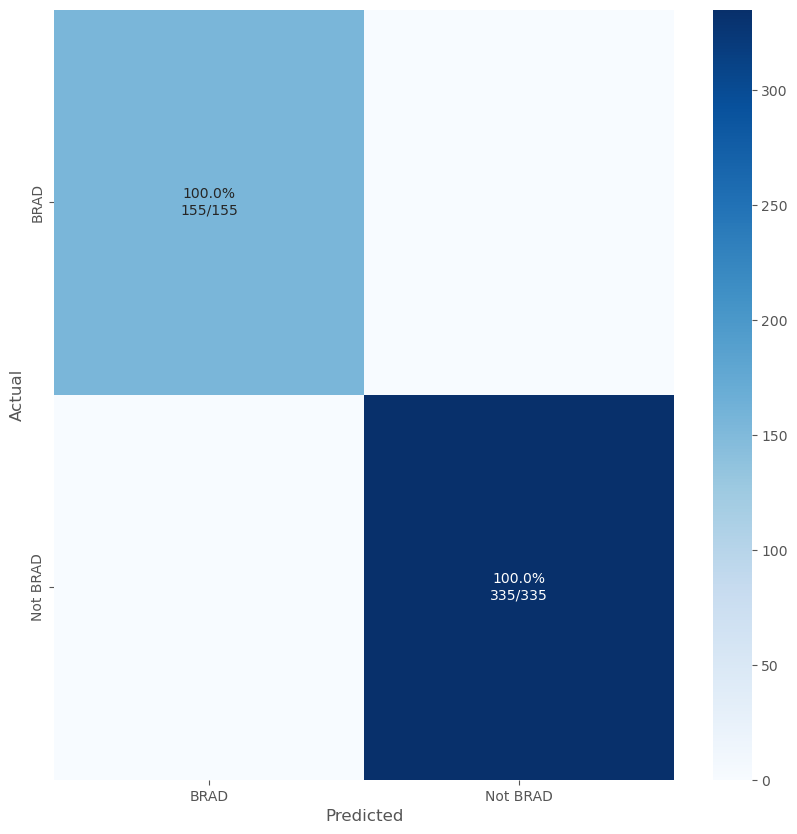

In [13]:
# importación de la matriz de confusión para comparar las etiquetas reales de las pruebas con las predichas por el modelo

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# crear etiquetas a partir de las etiquetas binarias "0" y "1" para facilitar la visualización
y_test_labels = np.where(y_test, 'BRAD', 'Not BRAD')
logreg_pred_labels = np.where(logreg_predicted, 'BRAD', 'Not BRAD')

def plot_cm(y_true, y_pred, figsize=(10,10)):
    """
        Plot para la matriz de confusión que toma las etiquetas de los valores reales y previstos
    """
    
    # implementación de la matriz de confusión
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test_labels, logreg_pred_labels)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/logreg_untuned_conmatrix.png')

# liberación de la asignación de memoria
del logreg_pred_labels

¡Vaya! Predijimos perfectamente qué muestras eran _BRAD_ y cuáles no. Asombroso de verdad...

Ahora bien, este tipo de capacidad de predicción perfecta debería plantear dudas sobre nuestro modelo. Recordemos que cuando algo así ocurre, esto se conoce como __Overfitting__ . Además, tenemos un _mensaje de advertencia_ del modelo sklearn _"ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT"_ . Nuestro modelo de Regresión Logística no convergió y como resultado los paramentros simplemente residen en algún lugar de los límites.

El mensaje también da opciones sobre cómo _posiblemente_ lograr la convergencia, ya sea aumentar el número de iteraciones que realiza el modelo o aumentar el número de muestras en nuestros datos. Vamos a aprovechar esta oportunidad para explorar una forma de abordar un conjunto de datos de características/dimensiones tan elevadas. 

### Análisis de Componentes Principales _(PCA)_

Como se mencionó anteriormente, _Principar Component Analysis_ es fundamentalmente un algoritmo de reducción dimensional, que puede ser útil para el filtrado de ruido, la selección de características importantes, y visualizaciones de datos de alta dimensionalidad.

El algoritmo de PCA calcula los _ejes principales_ en nuestro conjunto de datos, lo que básicamente significa que busca la varianza máxima en nuestras características o variables. El algoritmo recorre todas las combinaciones de características y calcula vectores para la varianza máxima, proyectando básicamente nuestro conjunto de datos original en un plano definido por estos vectores. 

Podemos llamar al algoritmo _PCA_ a través de sklearn, seleccionar el número de componentes que nos gustaría que nuestro conjunto de datos se reduzca a (por defecto 2), transformar nuestros datos, y volver a ejecutar nuestro modelo de regresión logística con este nuevo subconjunto.

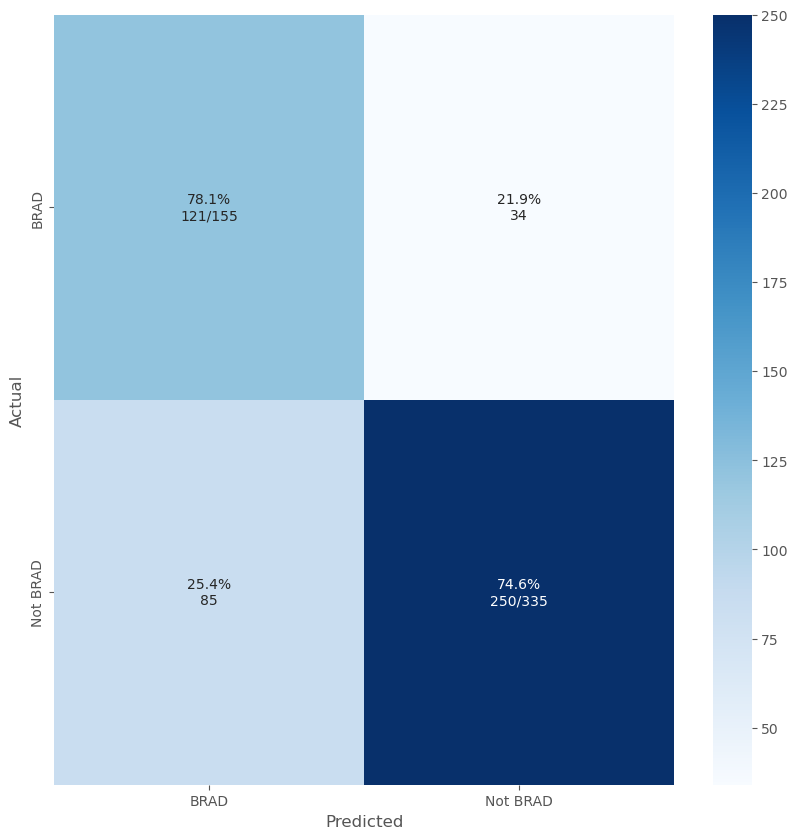

In [14]:
#  importación de PCA desde sklearn

from sklearn.decomposition import PCA

# aplicación de la PCA
pca = PCA(n_components=2) # suponemos que para mantener 2 componentes, pero no importa
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))

# instanciación del modelo, cambiando el hiperparámetro class_weight para tener en cuenta las clases desequilibradas
lrpca_cls = LogisticRegression(class_weight='balanced')

# modelo de entrenamiento
lrpca_cls.fit(pca_X_train, y_train)

# hacer predicciones 
lr_pca_pred = lrpca_cls.predict(pca_X_test)

lrpca_pred_labels = np.where(lr_pca_pred, 'BRAD', 'Not BRAD')

# viz para la matriz de confusión
plot_cm(y_test_labels, lrpca_pred_labels)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/logreg_tuned_conmatrix.png')
# liberar la memoria
del lrpca_pred_labels

In [15]:
# llamamos a la función matrics para comprobar lo bien que funcionaban nuestras predicciones
from sklearn import metrics

print(metrics.classification_report(lr_pca_pred, y_test))
print("Accuracy: %3f" % (np.mean(lr_pca_pred == y_test)))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       284
           1       0.78      0.59      0.67       206

    accuracy                           0.76       490
   macro avg       0.76      0.73      0.74       490
weighted avg       0.76      0.76      0.75       490

Accuracy: 0.757143


Bien, ahora que hemos implementado el PCA y realizado algunos cambios en el hiperparámetro para tener en cuenta el desequilibrio de nuestro conjunto de datos, tenemos un modelo y unas predicciones más realistas. 

De acuerdo, vemos que con algunos retoques hemos encontrado un modelo mejor según nuestras métricas.

Podríamos incluso preguntarnos si fue apropiado reducir la dimensión del ACP a sólo 2 componentes principales. Para ello nos fijamos en la cantidad de varianza que se explica por el _primer N PCs_.

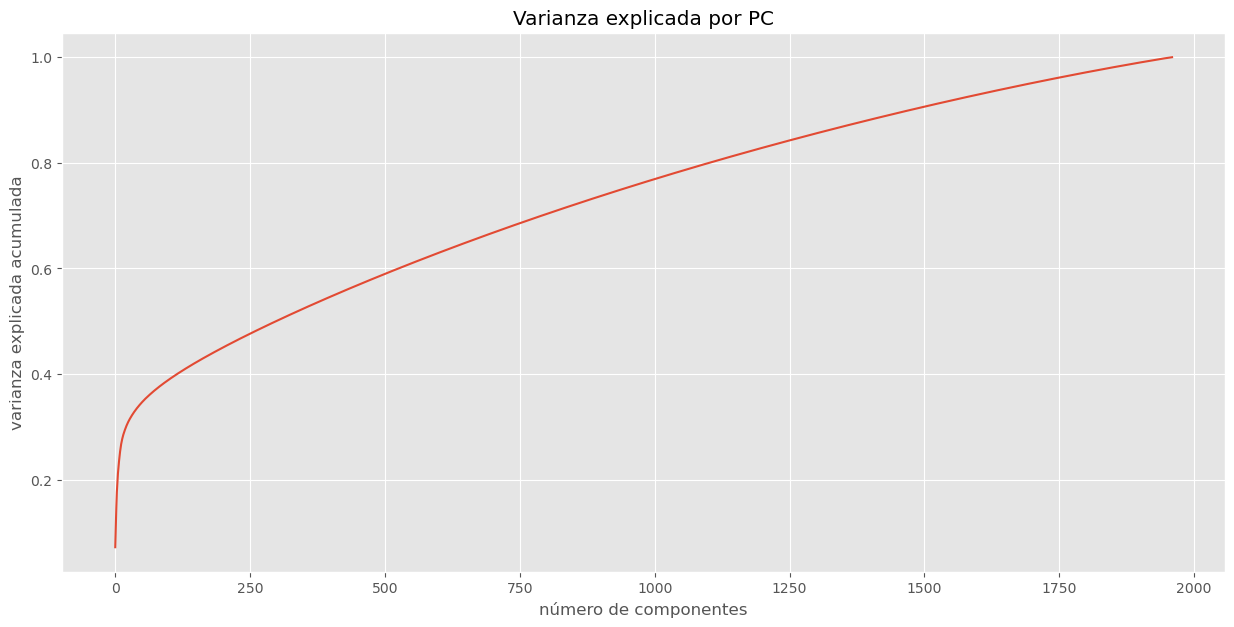

In [16]:
# hacemos un PCA para comprobar cuántos PC son lo suficientemente buenos para explicar la varianza

pca = PCA().fit(X_train)

# configuración de los parámetros de las cifras para el tamaño
fig_dims = (15, 7)
fig, ax = plt.subplots(1,1,figsize=fig_dims)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Varianza explicada por PC')
plt.xlabel('número de componentes')
plt.ylabel('varianza explicada acumulada')
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/PCA_explained_variance.png')

Ok, esto es mucho más interesante, vemos que necesitamos alrededor de 300 PCs para dar cuenta de alrededor del 80% de la varianza en nuestro conjunto de datos, mientras que mantenerlo en los 10s representaría alrededor del 30%-40%. Una dimensionalidad más baja como 2 y 3 es fácil de visualizar, por lo que es posible que sólo queramos mirar algo alrededor de esos valores si es para fines de visualización, pero también vamos a calcular cuánto mejoraría el modelo en la predicción de etiquetas si aumentamos el PC a 3.

En primer lugar, vamos a utilizar el PCA que tenemos con 2 componentes principales para configurar un visual y ver lo bien que los datos se ha dividido entre las muestras que son "BRAD" y los que son "NO BRAD

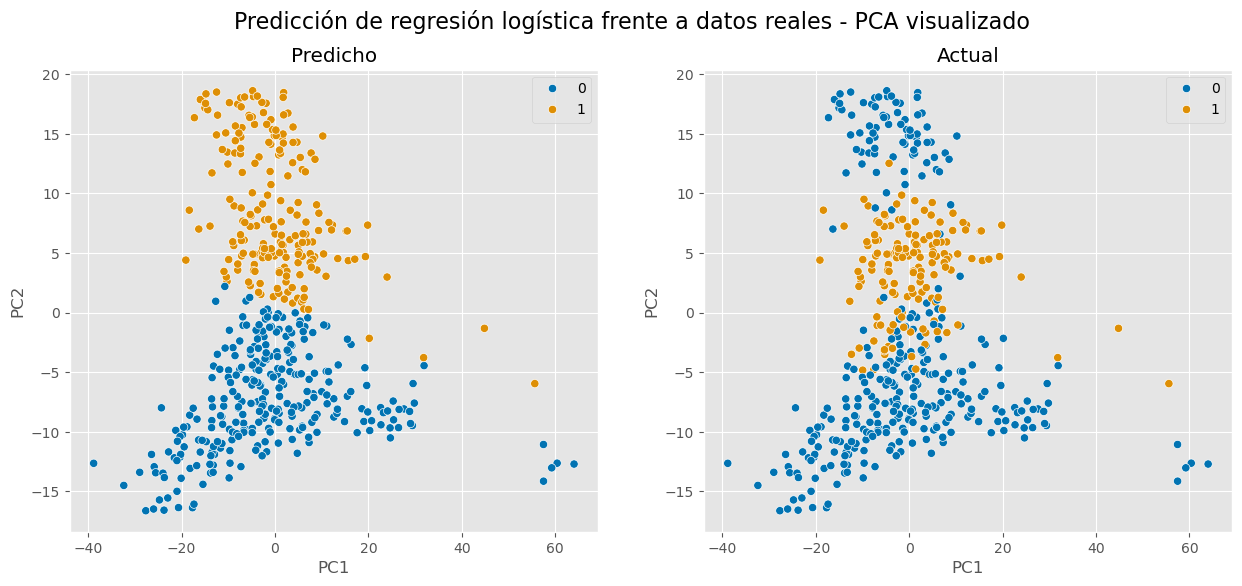

<Figure size 640x480 with 0 Axes>

In [17]:
fig_dims = (15, 6)
fig, ax = plt.subplots(1, 2, figsize=fig_dims)

# Datos para el eje a partir de PCs
xline = pca_X_test.iloc[:, 0]
yline = pca_X_test.iloc[:, 1]

# Gráficas
sns.scatterplot(x=xline, y=yline, hue=lr_pca_pred, palette='colorblind', ax=ax[0], legend='full')
sns.scatterplot(x=xline, y=yline, hue=np.array(y_test), palette='colorblind', ax=ax[1], legend='full')

ax[0].set_title("Predicho")
ax[1].set_title("Actual")
ax[0].set(xlabel="PC1", ylabel="PC2")
ax[1].set(xlabel="PC1", ylabel="PC2")

fig.suptitle('Predicción de regresión logística frente a datos reales - PCA visualizado', fontsize=16)

# Ajuste de leyenda en las subtramas, en vez de fuera
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

# Mostrar y guardar la figura
plt.show()
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/logreg_separation_PCA.png')


El gráfico muestra el gran poder que el ACP puede tener en el análisis de nuestros datos. Recuerden que nuestro conjunto de datos fue originalmente de más de 50K genes o características y luego proyectó los datos y redujo la dimensión de nuestro conjunto de datos a sólo 2 dimensiones ... e hizo un buen trabajo en mostrar una separación de nuestras 2 clases, pero tiene algunas de las inexactitudes cuando se compara con los valores reales, lo que significa que nuestros datos tienen más complejidad que sólo las 2 dimensiones que utilizamos.

Ok ahora vamos a proceder a rehacer nuestro procedimiento PCA, pero para 3 componentes principales ahora y ver cuánto mejora nuestro clasificador.

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       282
           1       0.85      0.63      0.73       208

    accuracy                           0.80       490
   macro avg       0.81      0.78      0.78       490
weighted avg       0.81      0.80      0.79       490

Accuracy: 0.797959


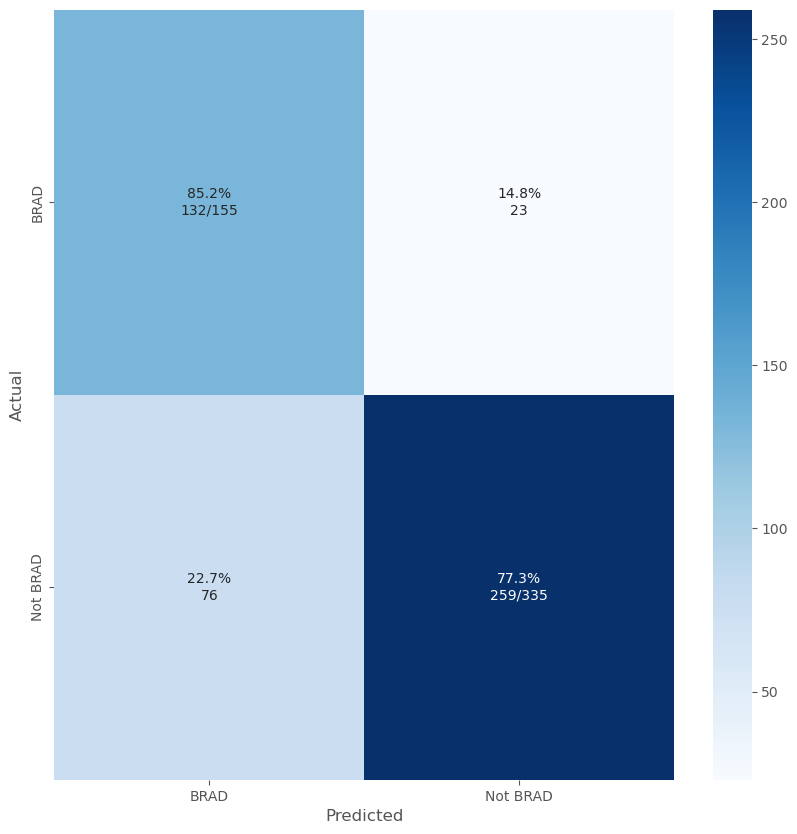

In [18]:
# Reejecutamos el procedimiento PCA

pca = PCA(n_components=3) #cambiamos a 3 componentes
newdf_train = pca.fit_transform(X_train)
newdf_valid = pca.transform(X_test)

features_train = pd.DataFrame(newdf_train)
features_valid = pd.DataFrame(newdf_valid)  
del newdf_train, newdf_valid

lrpca_cls = LogisticRegression(class_weight='balanced') 
lrpca_cls.fit(features_train, y_train)
lr_pca_pred = lrpca_cls.predict(features_valid)

lrpca_pred_labels = np.where(lr_pca_pred, 'BRAD', 'Not BRAD')

plot_cm(y_test_labels, lrpca_pred_labels)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/logreg_tuned_conmatrix.png')
print(metrics.classification_report(lr_pca_pred, y_test))
print("Accuracy: %3f" % (np.mean(lr_pca_pred == y_test)))

¡INCREÍBLE! Aumentar los PCs a 3 incrementó nuestras métricas de rendimiento significativamente, pasando de un 70% a cerca de un 80% en la mayoría de las métricas. Esto puede no ser siempre el caso cuando sólo se aumenta un valor en 1 PC, pero esta es la parte del proceso de aprendizaje automático donde el _arte de la ciencia_ entra en juego y _descubrimos cómo ajustar_ nuestros hiperparámetros para un mejor rendimiento. 


## 3.3 Árboles de decisión y bosques aleatorios

La _Regresión Logística_ es un buen modelo para empezar, y funciona bien específicamente si queremos intentar clasificar cada tipo de cáncer individualmente, es decir, hacer 5 modelos para cada uno de los cánceres donde establecemos un '1' o un '0' a la muestra tal y como hicimos para las muestras 'BRAD'.

### Modelos de árbol de decisión

Otro modelo de aprendizaje automático que funciona bien y es bastante popular por su sencillez de uso son los _Árboles de decisión_ . Al igual que la Regresión Logística, los Árboles de Decisión trabajan con datos binarios, por lo que podríamos volver a ejecutar nuestro ejemplo anterior pero con el modelo `DecisionTreeClassifier` de sklearn.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       332
           1       0.97      0.96      0.96       158

    accuracy                           0.98       490
   macro avg       0.98      0.97      0.97       490
weighted avg       0.98      0.98      0.98       490

Accuracy: 0.977551


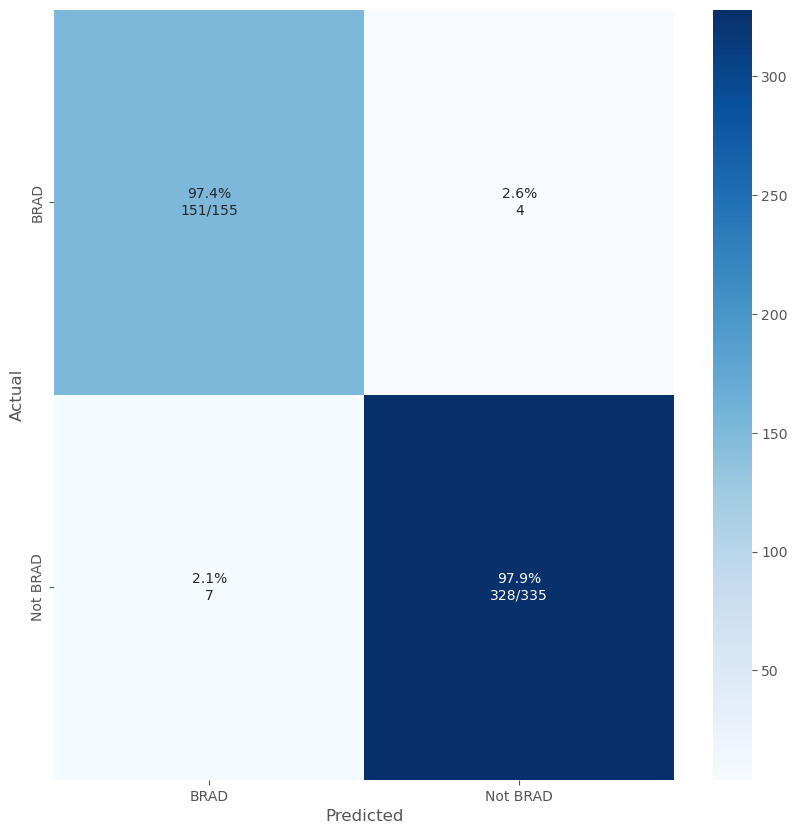

In [19]:
# importing the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
#create instance of model
dtc_model = DecisionTreeClassifier()
# fit the model on train data
dtc_model.fit(X_train, y_train)
# make prediction
dtc_pred = dtc_model.predict(X_test)

# labels for vizual
dtc_pred_labels = np.where(dtc_pred, 'BRAD', 'Not BRAD')

# display results
plot_cm(y_test_labels, dtc_pred_labels)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/dTree_conmatrix.png')
print(metrics.classification_report(dtc_pred, y_test))
print("Accuracy: %3f" % ( np.mean(y_test==dtc_pred)))

El modelo _Decision Tree_ obtuvo unos resultados fantásticos en casi todas las métricas. Esta es otra de las ventajas de los modelos _tree_, en los que incluso con los hiperparámetros de base, muy poco o ningún ajuste, se obtiene un buen rendimiento. 

Otra buena característica de los modelos de árbol es que podemos ver la importancia de las características, es decir, cuánta influencia tiene una característica específica (en nuestro caso, un gen) en el modelo. 

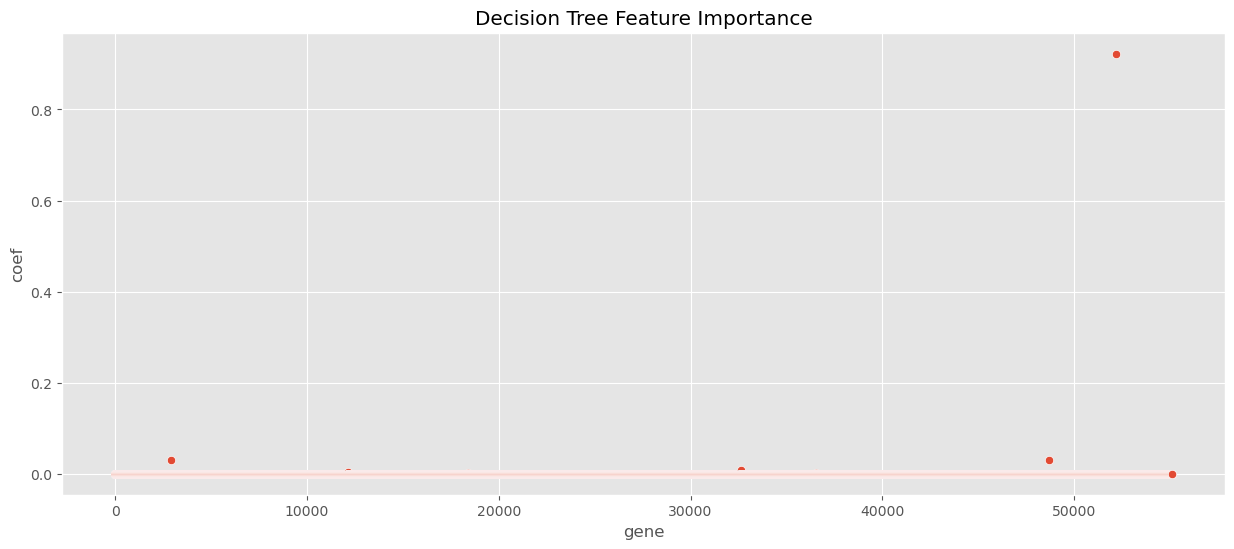

In [20]:
# configuración de los parámetros de la cifra para el tamaño

fig_dims = (15, 6)
fig, ax = plt.subplots(1,1,figsize=fig_dims)

d2 = pd.DataFrame(dtc_model.feature_importances_.T).reset_index()
d2.columns = ['gene', 'coef']
sns.scatterplot(y='coef',x='gene',data=d2)
plt.title('Decision Tree Feature Importance')
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/dTree_feature_importance.png')

___Nota:___ _Los resultados pueden variar para la importancia de la característica dada la naturaleza estocástica del algoritmo. Deberíamos considerar ejecutar el ejemplo varias veces y comparar el resultado medio o podemos ejecutar un RandomForest (un emsemble de DecisionTrees)_ .


In [21]:
pd.DataFrame(dtc_model.feature_importances_).reset_index().rename(
    columns={'index':'gene',0:'Feature Importance'}).nlargest(5, 'Feature Importance')

,gene,Feature Importance
52172,52172,0.922400
2921,2921,0.030440
48692,48692,0.029895
32613,32613,0.008611
12145,12145,0.004394


A partir de la _importancia de la característica_ de este árbol específico, vemos que el gen con el índice `52172` parece tener la mayor importancia en el modelo. Se podrían hacer algunas consideraciones al respecto y tal vez decidir realizar más experimentos sobre este gen y ver cómo afecta o se relaciona con el _Cáncer de Mama_ .

### Modelos RandomForests

"Los árboles no dejan ver el bosque", una cita que sugiere que podemos perdernos el panorama general si nos centramos demasiado en los pequeños detalles. No se trata de sugerir que los pequeños detalles no sean importantes, sino de una forma agradable de decirnos _"Oye, ¿por qué usar sólo un modelo de árbol, cuando podemos ver un montón de ellos?_ .

Los modelos ___Random Forest___ son un conjunto de modelos de árbol, en los que definimos cuántos árboles queremos. Se pueden utilizar no sólo para la clasificación, sino también para la regresión, ejecutando una multitud de estos modelos de árbol y obteniendo la clase que es la predicción media de los árboles individuales. Una ventaja añadida para nuestros fines de _clasificación del tipo de cáncer_ que aportan los modelos de Randon Forest es que nos permiten realizar múltiples clases y no sólo ceñirnos a la clasificación binaria de los dos modelos anteriores. Así que ahora intentaremos ver hasta qué punto podemos clasificar todas las muestras de nuestros datos de prueba de una sola vez.

Podemos llamar a nuestro _Modelo de clasificación_ llamando a la función `RandomForestClassifier` de sklearn. En primer lugar, tenemos que volver a dividir nuestros datos de nuevo, ya que antes sólo teníamos las etiquetas binarias y ahora queremos todas las etiquetas para cada muestra.

In [22]:
# primero convertimos las etiquetas en factores 
# PRAD:0, BRAD:1, COAD:2, LUAD:3, KIRC:4
Y = pd.factorize(data['cancer_type'])[0]

# Now we pass to create train test sets/Ahora pasamos a crear conjuntos de pruebas de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [23]:
# Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

# instanciamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# ajustar o entrenar el modelo
rf_model.fit(X_train, y_train)
# hacemos las predicciones
rf_pred = rf_model.predict(X_test)

# calcular parámetros para comprobar el rendimiento de nuestro modelo
print(metrics.classification_report(rf_pred, y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.98      0.99       158
           2       1.00      0.99      0.99        90
           3       0.97      1.00      0.98        84
           4       0.99      1.00      0.99        79

    accuracy                           0.99       490
   macro avg       0.99      0.99      0.99       490
weighted avg       0.99      0.99      0.99       490



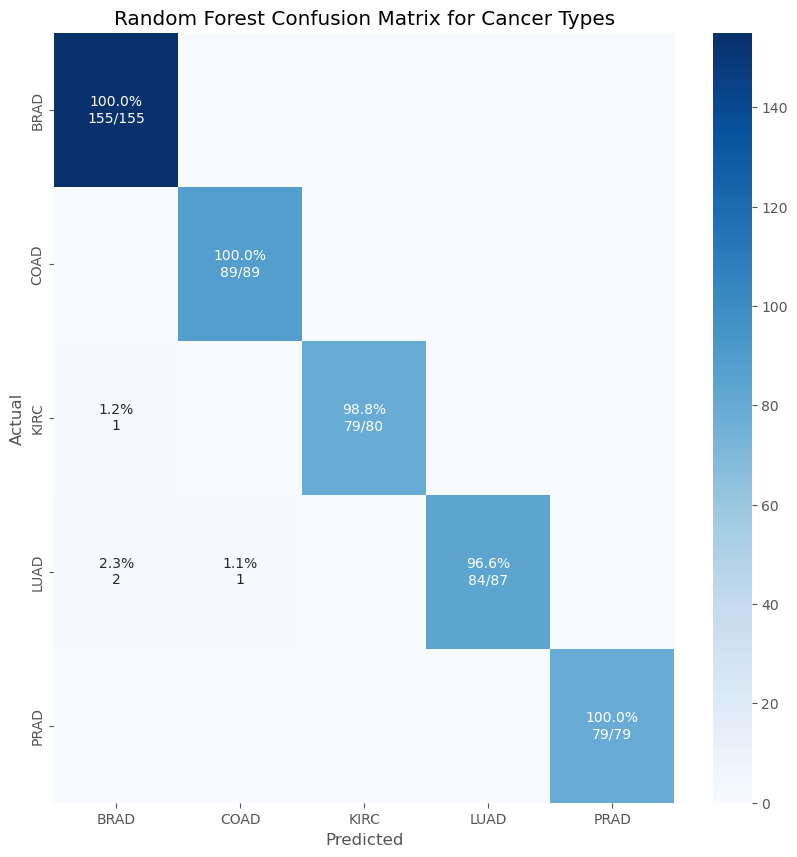

In [24]:
# Creación de etiquetas para las predicciones del tipo de cáncer de los números a las etiquetas

cond_test = [ y_test == 0, y_test == 1, y_test == 2, y_test == 3, y_test == 4 ]
cond_pred = [ rf_pred == 0, rf_pred == 1, rf_pred == 2, rf_pred == 3, rf_pred == 4 ]
choices = [ 'PRAD', 'BRAD', 'COAD', 'LUAD', 'KIRC']
rf_test_labels = np.select(cond_test, choices, default=np.nan)
rf_pred_labels = np.select(cond_pred, choices, default=np.nan)

plot_cm(rf_test_labels, rf_pred_labels)
plt.title('Random Forest Confusion Matrix for Cancer Types')
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/rForest_conmatrix.png')


Una vez más, vemos que el sencillo y no ajustado _Bosque aleatorio_ (modelos de árboles múltiples), tiene unas métricas de clasificación muy precisas para nuestros datos de recuento de genes.

Como ya hemos dicho antes, uno de los "problemas" o desventajas de los modelos _Tree_ es que pueden parecer una caja negra en la que "metes cosas y salen cosas que funcionan". No hay una manera fácil de evitar este hecho, pero algo que podría ayudarnos a entender hasta cierto punto lo que el modelo está haciendo, podemos tratar de visualizar a los niveles o secciones cómo el modelo coloca sus predicciones. 

Primero usaremos PCA de nuevo para reducir la dimensión de nuestros datos para propósitos de visualización, y luego crearemos esta función para ayudar a visualizar la clasificación del modelo.

In [25]:
# Implementando ACP
pca = PCA(n_components=3) 
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
pca_X_test = pd.DataFrame(pca.transform(X_test))

In [26]:
def visualize_classifier(model, X, y,X_test, y_test, ax=None):
    """
        Creates a visualization grid space for the areas a data point fall into
    """
    ax = ax or plt.gca()
    # Plot the training points
    scatter = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap='rainbow', edgecolors= "black",
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow')
    
    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements())
    ax.add_artist(legend1)

    ax.set(xlim=xlim, ylim=ylim)


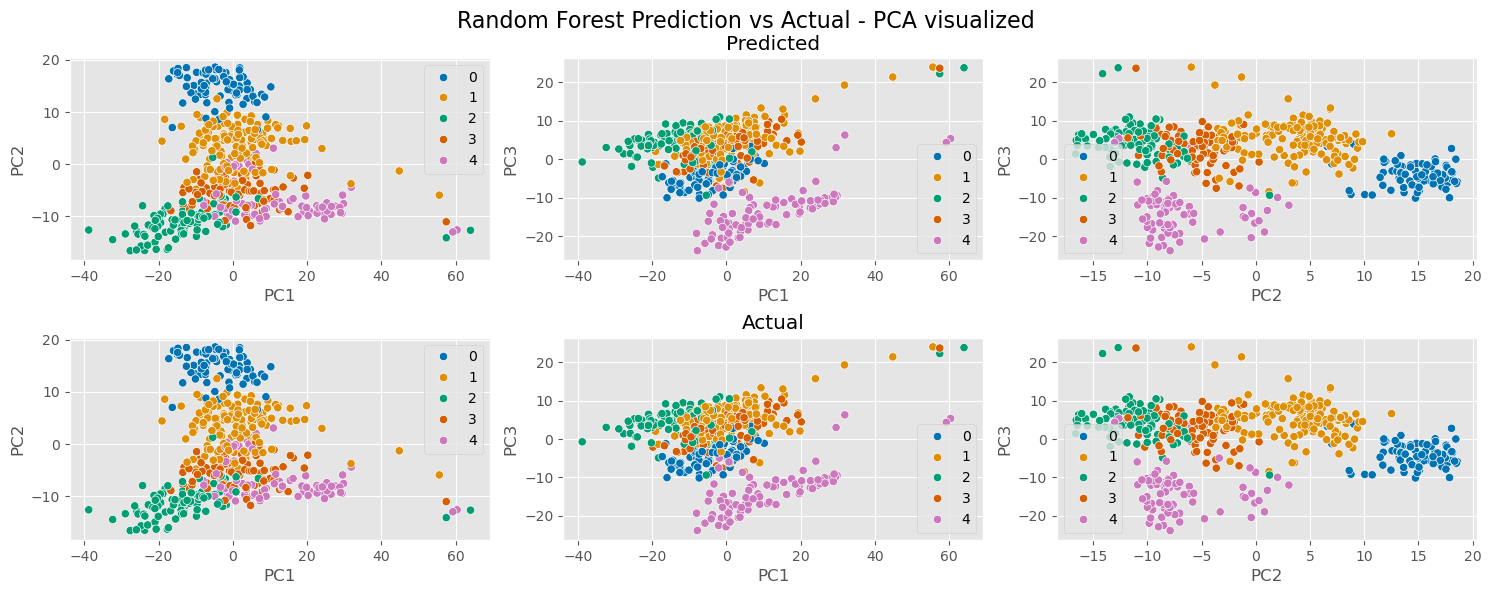

In [27]:
# setting figure parameters for size
fig_dims = (15, 6)
fig, ax = plt.subplots(2, 3, figsize=fig_dims)

# Data for a axis from PCs
xline = pca_X_test.iloc[:, 0]
yline = pca_X_test.iloc[:, 1]
zline = pca_X_test.iloc[:, 2]

# plotting predicted
sns.scatterplot(x=xline, y=yline, hue=rf_pred, palette='colorblind', ax=ax[0, 0], legend='full')
sns.scatterplot(x=xline, y=zline, hue=rf_pred, palette='colorblind', ax=ax[0, 1])
sns.scatterplot(x=yline, y=zline, hue=rf_pred, palette='colorblind', ax=ax[0, 2])

# plotting actual
sns.scatterplot(x=xline, y=yline, hue=np.array(y_test), palette='colorblind', ax=ax[1, 0], legend='full')
sns.scatterplot(x=xline, y=zline, hue=np.array(y_test), palette='colorblind', ax=ax[1, 1])
sns.scatterplot(x=yline, y=zline, hue=np.array(y_test), palette='colorblind', ax=ax[1, 2])

# Set titles and labels
ax[0, 1].set_title("Predicted")
ax[1, 1].set_title("Actual")
ax[0, 0].set(xlabel="PC1", ylabel="PC2")
ax[0, 1].set(xlabel="PC1", ylabel="PC3")
ax[0, 2].set(xlabel="PC2", ylabel="PC3")
ax[1, 0].set(xlabel="PC1", ylabel="PC2")
ax[1, 1].set(xlabel="PC1", ylabel="PC3")
ax[1, 2].set(xlabel="PC2", ylabel="PC3")

# Adjust layout
plt.tight_layout(pad=1)
plt.subplots_adjust(top=0.9)

# Add title and save
fig.suptitle('Random Forest Prediction vs Actual - PCA visualized', fontsize=16)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/rForest_separation_PCA.png')
plt.show()



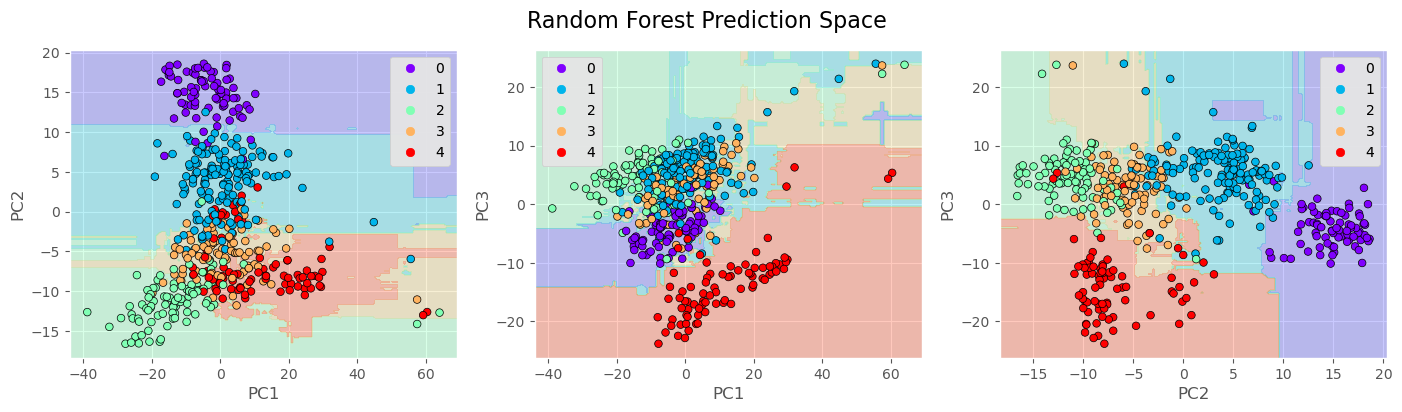

In [28]:
# configuración de los parámetros de las cifras para el tamaño

fig_dims = (17, 4)
fig, ax = plt.subplots(1,3,figsize=fig_dims)
visualize_classifier(rf_model, np.array(pca_X_train)[:,:2], y_train,np.array(pca_X_test)[:,:2], y_test,ax=ax[0])
visualize_classifier(rf_model, np.array(pca_X_train)[:,[0,2]], y_train,np.array(pca_X_test)[:,[0,2]], y_test,ax=ax[1])
visualize_classifier(rf_model, np.array(pca_X_train)[:,1:], y_train,np.array(pca_X_test)[:,1:], y_test,ax=ax[2])

ax[0].set(xlabel="PC1", ylabel="PC2")
ax[1].set(xlabel="PC1", ylabel="PC3")
ax[2].set(xlabel="PC2", ylabel="PC3")

fig.suptitle('Random Forest Prediction Space', fontsize=16)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/rForest_Decision_space.png')
plt.show()

Vemos cómo los valores predichos frente a los reales para el bosque aleatorio lo hicieron extremadamente bien, como se esperaba de la matriz de confusión. Sin embargo, también es muy interesante ver cómo el "espacio de decisión predicho" (como lo llamamos para esta visualización) muestra que no todos los puntos de un _color_ específico para un conjunto de _PCs_ acaban con esa etiqueta. Esto implica además que hay más complejidad de la que puede describirse óptimamente con nuestros valores de ACP, lo cual es de esperar. No obstante, esto nos proporciona una ayuda visual bastante buena para entender la magia de la "caja negra" de un modelo de bosque aleatorio. 

## 3.4 Máquinas de vectores soporte _(SVM)_

El último modelo supervisado que utilizaremos para lograr nuestro objetivo de _Clasificar tipos de cáncer utilizando datos de recuento de genes_ es un modelo de _Máquinas de vectores de soporte (SVM)__. 


In [29]:
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=100, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

SVMs proporciona una amplia gama de puesta a punto para que podamos optimizar nuestro modelo y en este punto nos empezaría a preguntarse acerca de cómo sintonizar nuestro [___hyperparameters___](https://en.wikipedia.org/wiki/Hyperparameter_optimization) (pensar como un 'Knob' en una radio), que recuerdan son _'paramenters'_ intrisic a nuestro modelo que podemos cambiar alrededor, para mejorar nuestro modelo. Esto podría ser cambiando el peso que damos a nuestras clases o un número de otros parámetros. Para nuestro ejemplo, vamos a centrarnos en cambiar los parámetros `svs_C` y `svc_gamma` y hacer una _Grid Search_ para algunos valores. 

[___Grid Search___](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search) es un método donde proporcionamos un conjunto de parámetros para que nuestro modelo calcule y donde obtendríamos el valor _optimizado_ para el conjunto de parámetros (o _Grid_ ) que proporcionamos. Para nuestra búsqueda de cuadrícula, puesto que ya tenemos una idea de la proporción de las categorías binarias (sí BRAD y No BRAD), probaremos los valores `{'svc__C': [1, 5, 10]}` y `{'svc__gamma': [0.0001, 0.0005, 0.001]}` que están cerca del valor y ver cuál podría _optimizar_ nuestro modelo svm. 

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: user 43min 32s, sys: 2min 25s, total: 45min 57s
Wall time: 8min 39s
{'svc__C': 1, 'svc__gamma': 0.0005}


bien! así que tenemos que el valor del modelo optimizado proviene de la {'svc__C': 1, 'svc__gamma': 0.0005}, genial podemos introducirlo para nuestros pesos, obtener el mejor modelo y seguir adelante... sin embargo, si por alguna razón nos hubiéramos dado cuenta de que el hiperparámetro es uno de los límites en nuestra rejilla, es decir, los valores de "borde" en nuestras listas, esto significaría que necesitamos ampliar nuestra rejilla para un mejor valor. Para nuestro ejemplo podemos proceder con los mejores valores optained por la búsqueda de cuadrícula .
NOTA: Como podemos ver, la búsqueda en la cuadrícula puede llevar bastante tiempo. Es mejor si tenemos alguna idea de dónde confinar nuestros parámetros de búsqueda para un uso óptimo del tiempo.

In [31]:
# establecer el mejor modelo a partir de los parámetros de búsqueda de la cuadrícula
svc_model = grid.best_estimator_

# predicción de los valores de prueba
svc_pred = svc_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      0.98      0.99       158
           2       1.00      1.00      1.00        89
           3       0.98      1.00      0.99        85
           4       0.99      1.00      0.99        79

    accuracy                           0.99       490
   macro avg       0.99      1.00      0.99       490
weighted avg       0.99      0.99      0.99       490



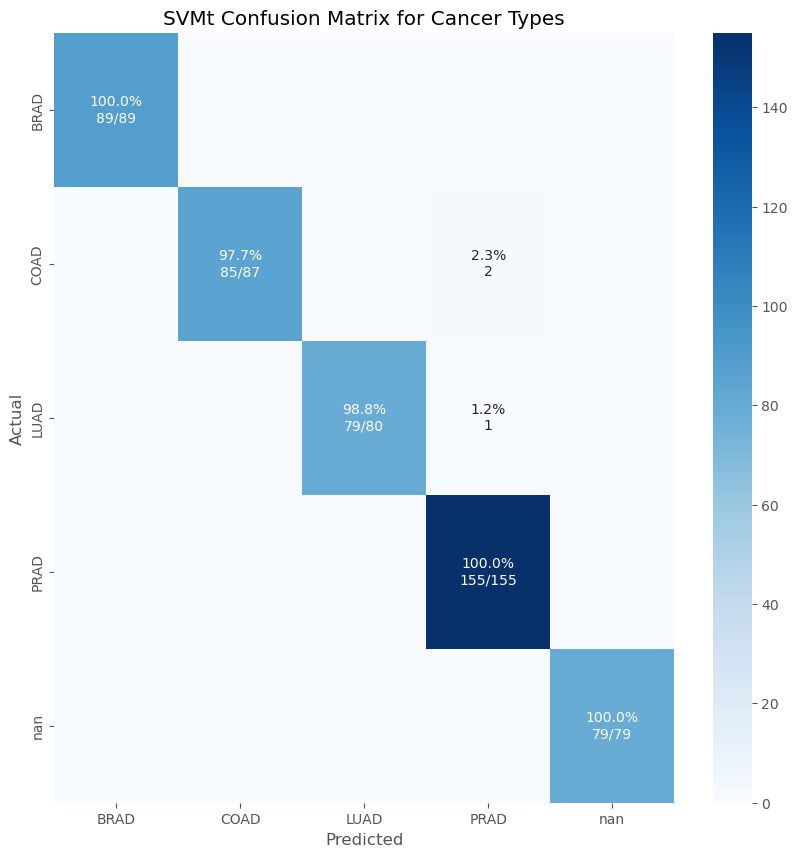

In [32]:
cond_test = [ y_test == 1, y_test == 2, y_test == 3, y_test == 4, y_test == 5 ]
cond_pred = [ svc_pred == 1, svc_pred == 2, svc_pred == 3, svc_pred == 4, svc_pred == 5 ]
choices = [ 'PRAD', 'BRAD', 'COAD', 'LUAD', 'KIRC']
svc_test_labels = np.select(cond_test, choices, default=np.nan)
svc_pred_labels = np.select(cond_pred, choices, default=np.nan)

print(metrics.classification_report(svc_pred, y_test))
plot_cm(svc_test_labels, svc_pred_labels)
plt.title('SVMt Confusion Matrix for Cancer Types')
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/SVM_conmatrix.png')


Vemos de nuevo que nuestro modelo SVM predice bien el tipo de cáncer del paciente dependiendo sólo de los datos de expresión del recuento de genes. Se pueden hacer mejoras, podría haber sobreajuste, pero como punto de partida para nosotros usando los modelos este es un buen lugar para pasar a la siguiente sección.

# 4. Aprendizaje automático no supervisado

En la siguiente sección haremos uso de las funciones de clustering de Scikit-Learn para realizar clustering en nuestros datos con los tres algoritmos cubiertos en la sección de antecedentes.

De forma similar a cómo utilizamos las funciones de sklearn para los modelos supervisados, hay un proceso estructurado que se puede seguir cuando se utilizan los modelos no supervisados de sklearn.

> Los pasos a seguir de nuevo serían:
- Instanciar el modelo
    - ej: `kmeans = KMmeans(*parámetros*)`
- Ajustar' el modelo entrenando con los datos
    - `kmeans.fit(*data*)`  
    Nota: Dado que estamos agrupando sin la intención explícita de hacer predicciones con nuestros modelos, no tenemos que dividir nuestros datos en conjuntos de 'entrenamiento' y 'prueba'. **Podemos simplemente entrenar los modelos con todos los datos**.__.
- Llamar a funciones para ver las "observaciones" o resultados del modelo
    - ex: `kmeans.labels_`  
    Nota: Casi todos los modelos de scikitlearn tienen un atributo "labels_". Podemos usarlo después del entrenamiento para acceder a las etiquetas que se han generado y así poder usarlas para colorear nuestras visualizaciones_

## 4.1 K-Means

Primero vamos a probar la agrupación K-Means. La función para K-Means de Scikit-Learn tiene muchos parámetros, el más importante es el número de clusters. Este es el número de puntos centrales con los que el algoritmo empezará (y terminará). 

Su selección del número de conglomerados K debe reflejar cuántos grupos cree que representan los datos.

Utilicemos los datos de expresión génica como base para la agrupación. Después veremos si los resultados de la agrupación se alinean con algún dato categórico, como la etiqueta del cáncer.

Para decidir cuántos clusters utilizar, basémonos en el número de tipos de cáncer. Esto supone que los conglomerados en los datos corresponderían a tipos de cáncer. En estos datos hay 5 tipos diferentes.

In [33]:
# importación del modelo deseado
from sklearn.cluster import KMeans

# Llamamos sklearn k-means clustering para 5 clusters
kmeans = KMeans(n_clusters=5).fit(X)

# Utilizamos PCA para reducir las características de visualización
pca_genes = PCA(n_components=3).fit_transform(X)

/Users/usuario/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


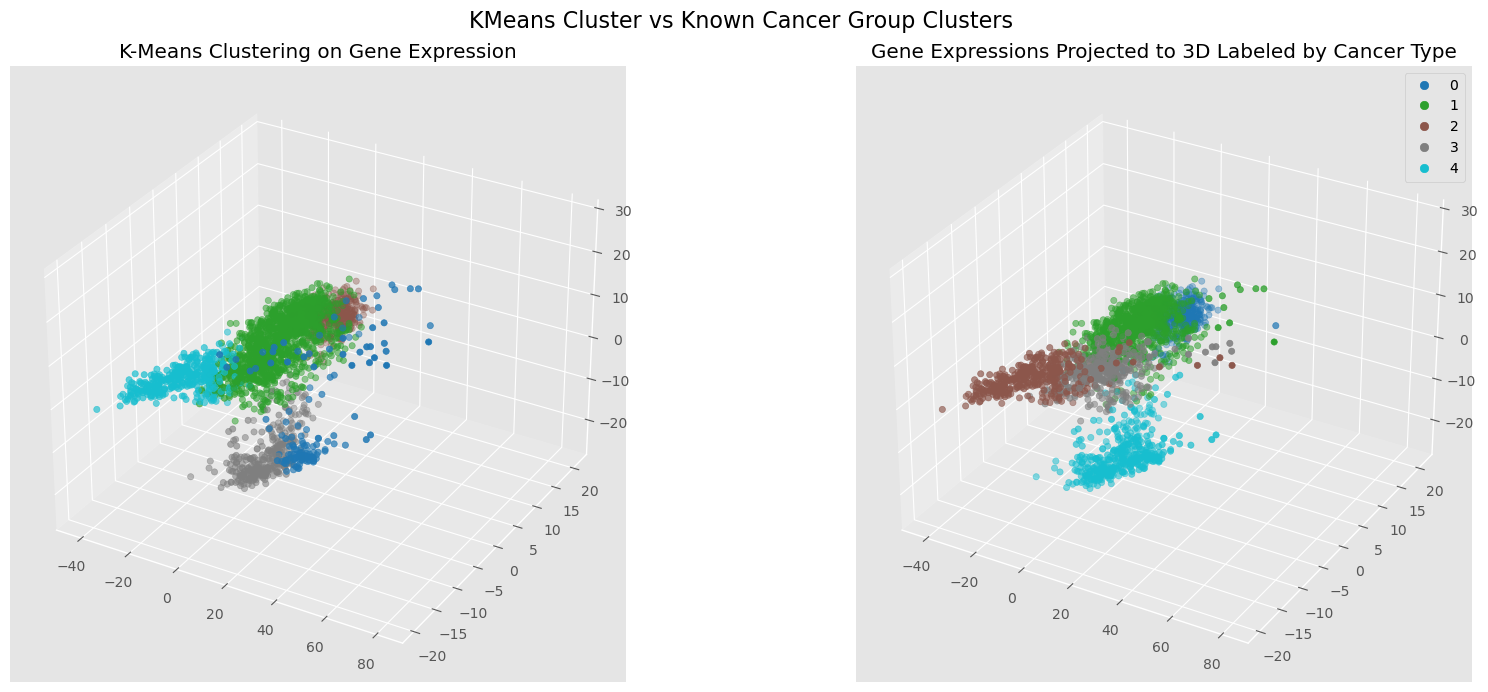

In [34]:
# Usamos Matplotlib para una visualización en 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(18)

# Clusters Kmeans utilizando kmeans.labels como color
ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_title("K-Means Clustering on Gene Expression")
ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], c=kmeans.labels_, cmap='tab10')

# Hacemos lo mismo pero colorea por tipo de cáncer
ax = fig.add_subplot(1,2,2, projection='3d')
labels = {"PRAD": 0, "BRCA": 1, "COAD": 2, "LUAD": 3, "KIRC" : 4}
ax.set_title("Gene Expressions Projected to 3D Labeled by Cancer Type")
ct_scatter = ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], 
                        c=genes_merged['cancer_type'].map(labels), cmap='tab10')

# producimos una leyenda con los colores únicos de la dispersión
ax.add_artist(ax.legend(*ct_scatter.legend_elements()))

plt.tight_layout(pad=1)
plt.subplots_adjust(top=0.9)

fig.suptitle('KMeans Cluster vs Known Cancer Group Clusters', fontsize=16)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/Kmeans_Cluster.png')
plt.show()

#### Resultados de K-Means
Como se puede ver en las visualizaciones anteriores, la agrupación K-means captura grupos que parecen ser agrupaciones (en realidad son manchas separadas). Además, 3 de los clusters identificados se alinean muy estrechamente con los tipos de cáncer, lo que indica que los clusters pueden realmente capturar algo útil en los datos.


## 4.2 Modelos de mezclas gaussianas
Hagamos exactamente lo mismo pero con un MMG. En este caso, el MMG no asigna directamente una etiqueta de conglomerado a los puntos, pero una vez generado el modelo, la gaussiana más probable para cada punto puede asignarse como su conglomerado.

Utilizamos los datos de dimensión reducida como entrada para la agrupación porque los datos completos requieren gigabytes de memoria para que se ejecute el algoritmo. Como se puede leer en la sección de antecedentes, GMM implica matemáticas significativamente más complejas que K-means.

In [35]:
# importamos GMM 
from sklearn.mixture import GaussianMixture
# Configurar el GMM con scikitlearnSet 
gmm = GaussianMixture(n_components=5)
# fit
gmm.fit(pca_genes)

GaussianMixture(n_components=5)

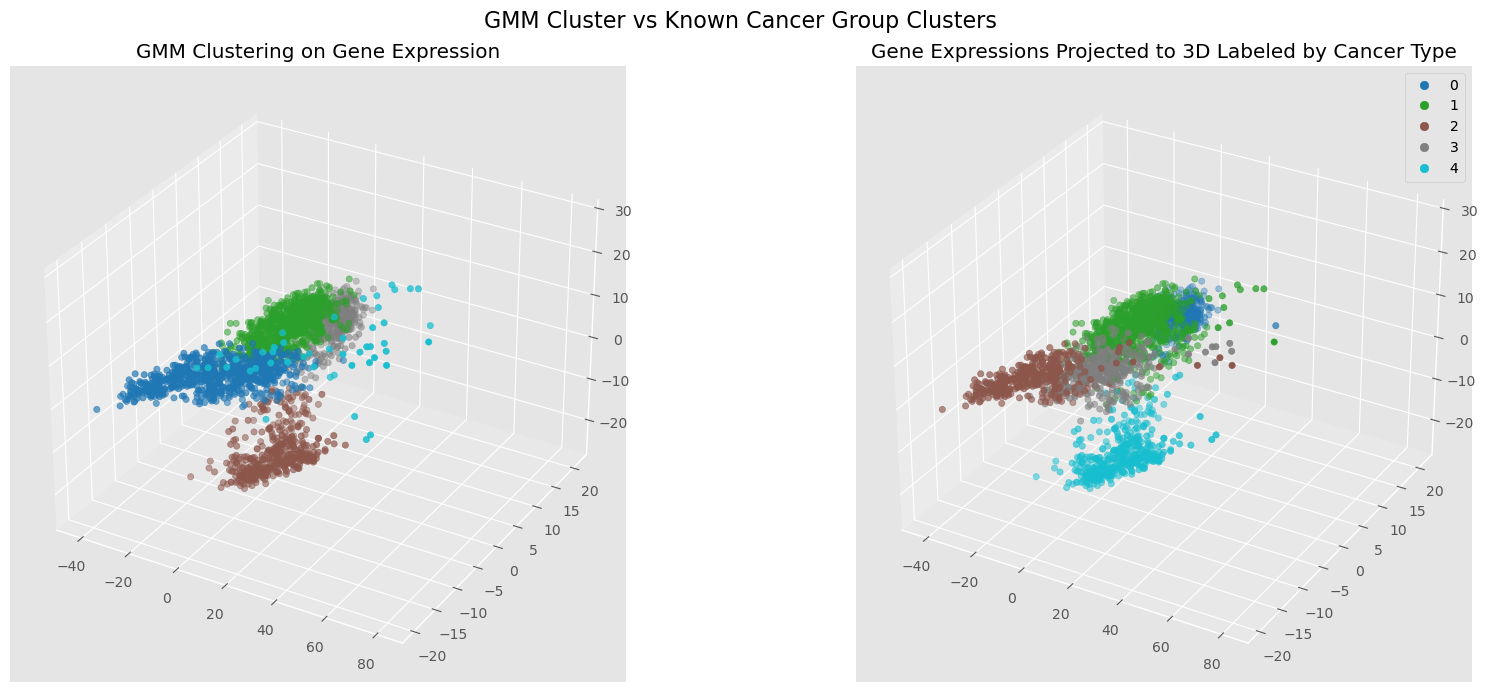

In [36]:
# Use the GMM to assign a label to each point
labels = gmm.predict(pca_genes)

# Visualize the results
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(18)

ax = fig.add_subplot(121, projection='3d')
ax.set_title("GMM Clustering on Gene Expression")
ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], c=labels, cmap='tab10')

# Do the same but color by cancer type
ax = fig.add_subplot(1,2,2, projection='3d')
labels = {"PRAD": 0, "BRCA": 1, "COAD": 2, "LUAD": 3, "KIRC" : 4}
ax.set_title("Gene Expressions Projected to 3D Labeled by Cancer Type")
ct_scatter = ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], 
                        c=genes_merged['cancer_type'].map(labels), cmap='tab10')

# produce a legend with the unique colors from the scatter
ax.add_artist(ax.legend(*ct_scatter.legend_elements()))

plt.tight_layout(pad=1)
plt.subplots_adjust(top=0.9)

fig.suptitle('GMM Cluster vs Known Cancer Group Clusters', fontsize=16)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/GMM_Cluster.png')
plt.show()

#### Resultado del modelo de mezclas gaussianas
El resultado anterior muestra uno de los puntos fuertes de los GMM frente a los K-Means. La agrupación inferior central (azul) es capaz de captar la forma más alargada del grupo subyacente. En general, los resultados son buenos e indican que los MMG son capaces de captar los grupos de tipos de cáncer en estos datos.


## 4.3 DBSCAN
Ahora vamos a probar la agrupación basada en la densidad en nuestros datos. Inmediatamente nos encontramos con uno de los retos de aplicar DBSCAN: debemos decidir qué distancia considerar alrededor de cada punto, y cuántos puntos requerir dentro de esa distancia. Estos parámetros de partida son la parte más importante para aplicar DBSCAN correctamente, ya que deben ser elegidos específicamente para sus datos.

Para ver un ejemplo de hasta qué punto esto es importante, vamos a ejecutar primero DBSCAN con algunos valores arbitrarios.

In [38]:
# importamos modelo
from sklearn.cluster import DBSCAN
# Set up DBSCAN and run it on our data
dbscan = DBSCAN(eps=1, min_samples=10)
# fit model
dbscan.fit(pca_genes)

DBSCAN(eps=1, min_samples=10)

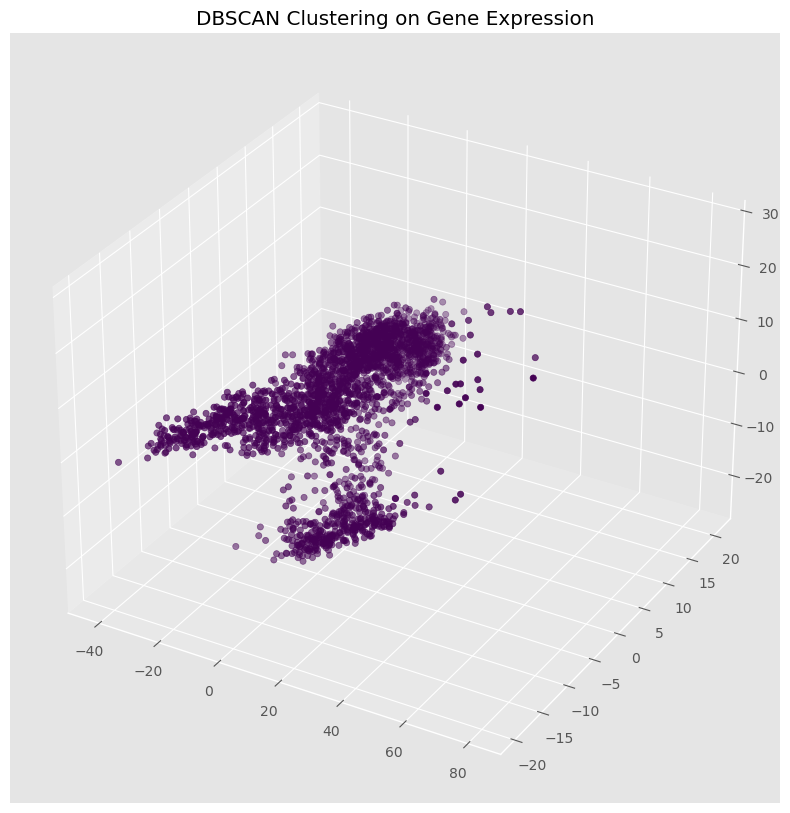

In [39]:
# Visualizamos los resultados
labels = dbscan.labels_

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("DBSCAN Clustering on Gene Expression")
ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], c=labels)

#### ¿Qué ha fallado?

Está claro que DBSCAN no funcionó, y a primera vista cabe preguntarse si siquiera hizo algo. 

¿Cómo pueden estar todos los puntos en un cluster? Si echamos un vistazo a las etiquetas asignadas a cada punto por DBSCAN, todas son -1. 

Esta es la etiqueta para el ruido. Esta es la etiqueta para el ruido. Todos nuestros puntos están siendo considerados como ruido por el modelo. Esto significa que una distancia de 1 alrededor de cada punto es demasiado pequeña para capturar los clusters aquí.

In [40]:
# Configurar DBSCAN con nuevos parámetros
dbscan = DBSCAN(eps=3, min_samples=10)
# modelo de ajuste
dbscan.fit(pca_genes)

DBSCAN(eps=3, min_samples=10)

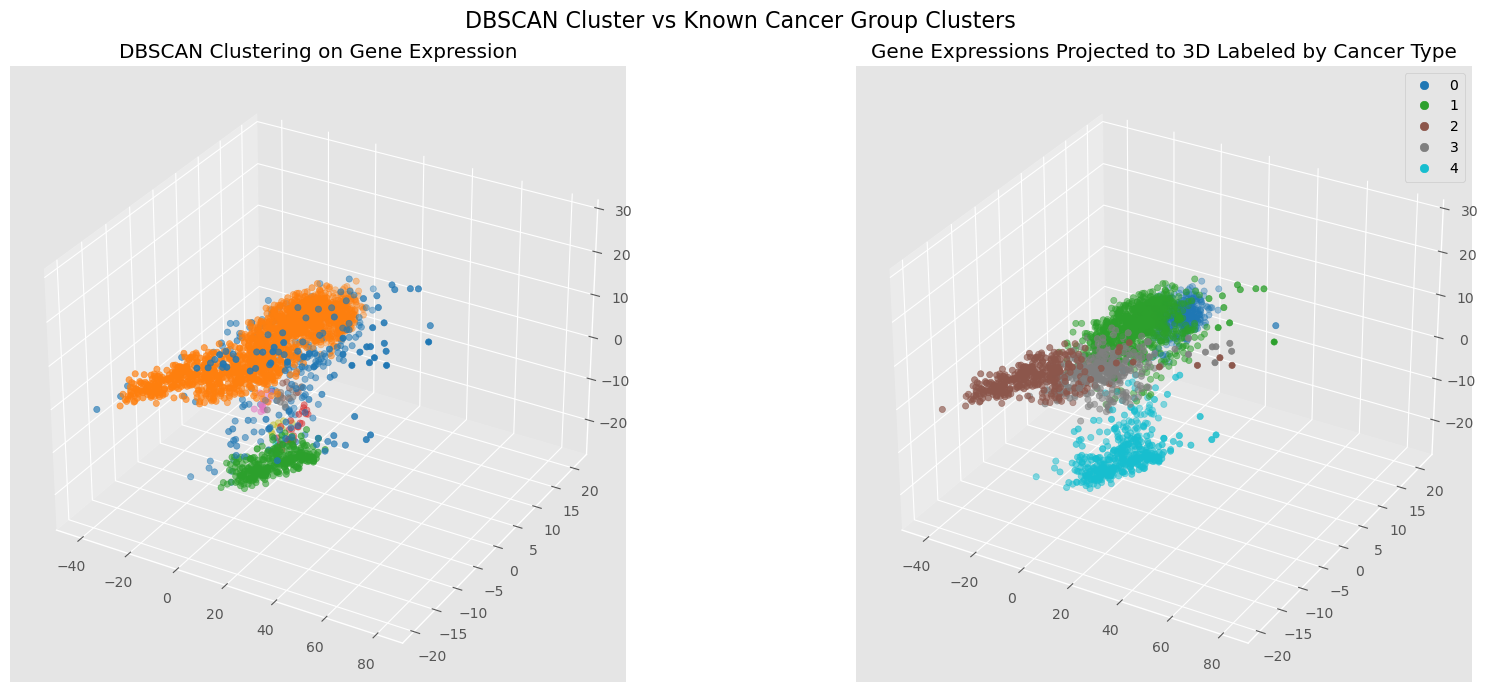

In [41]:
# Visualizamos los resultados
labels = dbscan.labels_

# Visualizamos los resultados
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(18)

ax = fig.add_subplot(1,2,1, projection='3d')
ax.set_title("DBSCAN Clustering on Gene Expression")
ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], c=labels, cmap='tab10')

# Hacemos lo mismo pero colorea por tipo de cáncer
ax = fig.add_subplot(1,2,2, projection='3d')
label = {"PRAD": 0, "BRCA": 1, "COAD": 2, "LUAD": 3, "KIRC" : 4}
ax.set_title("Gene Expressions Projected to 3D Labeled by Cancer Type")
ct_scatter = ax.scatter(pca_genes[:,0], pca_genes[:,1], pca_genes[:,2], 
                        c=genes_merged['cancer_type'].map(label), cmap='tab10')

# producimos una leyenda con los colores únicos de la dispersión
ax.add_artist(ax.legend(*ct_scatter.legend_elements()))

plt.tight_layout(pad=1)
plt.subplots_adjust(top=0.9)

fig.suptitle('DBSCAN Cluster vs Known Cancer Group Clusters', fontsize=16)
plt.savefig('/Users/usuario/Documents/ML_python/ML_python/3-Outputs/DBSCAN_Cluster.png')
plt.show()

#### Resultados de DBSCAN

Con los nuevos parámetros iniciales, DBSCAN puede capturar algunos conglomerados en nuestros datos, pero el resultado no se aproxima tanto a los grupos subyacentes como los métodos anteriores. Los puntos morados se etiquetan como ruido (no forman parte de un conglomerado). Esto demuestra uno de los puntos débiles de DBSCAN, y por qué debemos evaluar nuestros datos antes de elegir un algoritmo de agrupación. Como se ha señalado en el fondo, DBSCAN sufrirá cuando los clusters tengan cambios significativos en la densidad dentro de ellos. El cluster superior derecho capturado por GMM fue capaz de incluir algunos de los puntos más alejados que tienen el mismo tipo de cáncer (el cluster se alinea más estrechamente con lo que ocurre en nuestros datos). DBSCAN etiqueta muchos de ellos como ruido. 

Podríamos haber sabido que DBSCAN sería un mal modelo observando la visualización de los datos coloreados por tipo de cáncer. Los grupos subyacentes estaban estirados y ni siquiera se acercaban a una densidad uniforme. 

# Recapitulando

En este tutorial hemos sido introducidos a conceptos teóricos de _Aprendizaje Automático_ , donde hemos sido expuestos a la terminología general clave, información de fondo del modelo, y el uso de la librería de Aprendizaje Automático de python __Scikit-Learn__ y los mejores usos con la variedad de modelos disponibles a través de ella. Trabajamos a través de ejemplos tanto en _Supervised_ como en _Unsupervised_ utilizando los datos genómicos de PANCAN para realizar predicciones con modelos de Clasificación (Regresión Logística, modelos basados en Árbol, SVM) y análisis descriptivo a través de modelos de Clustering (KMeans, GMM, DBSCAN). Ahora debería estar lo suficientemente familiarizado con el material para empezar a implementar modelos de aprendizaje automático en python para su área específica de investigación.


- Tutorial 1 - Principiante]
- Tutorial 2 - Intermedio]
- Tutorial 3 - Avanzado] (*actual*) 

"Proximamente"... También puedes saltar a la [serie de lesiones de melenoma], el otro tutorial de Ciencia de Datos y Aprendizaje Automático.